In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import os
from astropy.constants import c
from astropy import constants as const
import astropy.units as u
from scipy import special


def weight(n):
    return 2 * n**2

def boltzmann(n1, n2, eV, T):
    k = 8.6173303e-5  # Boltzmann constant in eV/K
    g_n = weight(n2) / weight(n1) * np.exp(-eV / (k * T))
    return g_n

def CIV(T):
    sigma_Lya = 5.9e-14 * (T / 1e4) ** (-1/2)
    sigma_CIV = (0.19 / 0.4164) * sigma_Lya * (12) ** (0.5)
    N_CIV_0 = 1 / sigma_CIV
    return sigma_Lya, sigma_CIV, N_CIV_0

sig_ly, sig_c, N_CIV_0 = CIV(1e5)
print("{:.2e}".format(N_CIV_0))

def tau(sig_c, x):
    return sig_c * x


directory_1 = '/home/jin/data_CIV/'
rr = np.arange(12, 17, 1, dtype=np.float128)
atom_N = [13,20,32,50,79]
total_N_c = np.outer(10**rr, atom_N) / 10
total_N_c = total_N_c.flatten()

emit = np.arange(100,700,100)
emit = np.append([1,50],emit)

expand_vel = np.arange(0,1100,100)

random_vel= [11.8,30,50,100,150]


C_IV_K = 1548.187e-8  # cm
C_IV_H = 1550.772e-8  # cm

C_IV_K_A = 1548.187 # cm
C_IV_H_A = 1550.772  # cm

cc = c.to(u.cm / u.s).value
v_th = 11.7673179819719e5  # cm/s

K_gamma = 2.65e+8
H_gamma = 2.64e+8
f_CIV_K = 0.190
f_CIV_H = 0.0952


# directory_1 = '/home/jin/data_jin/'

cc_k = c.to(u.km / u.s).value
V_K = 0
V_H = (C_IV_H/C_IV_K -1 ) * cc_k
def function(sigma,lam,lam_k,lam_h):
    tv_k = ((lam-lam_k) / lam_k ) * cc_k
    tv_h = ((lam-lam_h) / lam_h ) * cc_k
    tk = (tv_k)**2 / sigma**2
    th = (tv_h)**2 / sigma**2
    fx = (1 / np.sqrt(2*np.pi*sigma**2))  *(2*np.exp(-tk/2) + np.exp(-th/2) )
    f0 = fx[np.argmax(fx)]
    return fx , f0

# plt.plot(del_V_space_g,yy_g)


def finding_FWHM_K(x, y,v_0):


    y_1_max = y.max()
    yc_1 = y_1_max / 2
    x_f_1 = []

    for ii in range(len(y) - 1):
        bb_1 = (y[ii] - yc_1) * (y[ii+1] - yc_1)    
        if bb_1 < 0:
            x_f_1.append(x[ii])

    if x_f_1 :
        # blue_w = abs(min(x_f_1) - x_1[np.argmax(y_1)])
        FWHM = abs(min(x_f_1) - v_0)
    else:
        FWHM = 0

    # print(yc_1, yc_2)
    return FWHM*2


def finding_FWHM_H(x, y,v_0):

    y_1_max = y.max()
    yc_1 = y_1_max / 2
    x_f_1 = []

    for ii in range(len(y) - 1):
        bb_1 = (y[ii] - yc_1) * (y[ii+1] - yc_1)    
        if bb_1 < 0:
            x_f_1.append(x[ii])

    if x_f_1 :
        # blue_w = abs(min(x_f_1) - x_1[np.argmax(y_1)])
        FWHM = abs(min(x_f_1) - v_0)
    else:
        FWHM = 0

    # print(yc_1, yc_2)
    return  FWHM*2

sigma_Lya, sigma_CIV, N_CIV_0 = CIV(1e5)
tau_0 = tau(sigma_CIV,total_N_c)

3.39e+13


In [1]:
directory_1 = '/home/jin/data_CIV/'

# Atom = [13,20,32,50,79]
# index = [12,13,14,15,16]
#expand = 0  - 1000  
# emit = [1,50]+ 100-1000
# vrand = [11.8,30,50]
def tot_spectrum(atom, index, expand, emit, vrand):
    if expand == 0 :
        expand_index = 0
    elif expand == 1000:
        expand_v = 100
        expand_index = 3
    else :
        expand_v = expand
        expand_index = 2 

    if emit == 1 :
        emit_index = 0
        emit_v = 100
    elif emit == 50 :
        emit_v = 500
        emit_index = 1
    elif emit == 1000 :
        emit_v =100
        emit_index = 3
    else : 
        emit_v =emit
        emit_index = 2

    if vrand == 11.8:
        v_rand = 118
        v_rand_index = 1
    elif vrand > 11.8 and vrand < 100 :
        v_rand = int(vrand*10)
        v_rand_index = 1
    else :
        v_rand = int(vrand)
        v_rand_index = 2   

    path_sp = f'{directory_1}N_atom{atom}0E+{index}_Vexp{expand_v}E+0{expand_index}_Vemit{emit_v}E+0{emit_index}_tauD000E+00_Vran{v_rand}E+0{v_rand_index}spec_com.dat'
    
    data_sp = pd.read_csv(path_sp, sep='\s+', header=None)
    sp_dlam = data_sp[0]
    sp = data_sp[1]

    # K and H line seperate
    lam_c = (C_IV_K_A+C_IV_H_A)/2
    #K line
    tot_x_K = sp_dlam [sp_dlam <= lam_c]
    tot_y_K = sp [sp_dlam <= lam_c]
    tot_x_H = sp_dlam [sp_dlam >= lam_c]
    tot_y_H = sp [sp_dlam >= lam_c]
    tot_vx_K = ((tot_x_K - C_IV_K_A) /  C_IV_K_A)*cc_k
    tot_vy_K=  tot_y_K
    tot_vx_H = ((tot_x_H - C_IV_K_A) /  C_IV_K_A)*cc_k
    tot_vy_H=  tot_y_H
    x_K_250 =  tot_x_K[tot_vx_K>= - 250]
    y_K_250 = tot_y_K[tot_vx_K>= - 250]

    x_H_250 =  tot_x_H[tot_vx_H<= 750]
    y_H_250 = tot_y_H[tot_vx_H <= 750]

    a_1 = inf(x_K_250.to_numpy(),y_K_250.to_numpy())
    a_2 = inf(x_H_250.to_numpy(),y_H_250.to_numpy())
    ratio = a_1/ a_2

    return tot_x_K.to_numpy(), tot_y_K.to_numpy(), tot_x_H.to_numpy(), tot_y_H.to_numpy(),tot_vx_K.to_numpy(), tot_vy_K.to_numpy(), tot_vx_H.to_numpy(), tot_vy_H.to_numpy(), ratio

def core_spectrum(atom, index, expand, emit, vrand):
    if expand == 0 :
        expand_index = 0
    elif expand == 1000:
        expand_v = 100
        expand_index = 3
    else :
        expand_v = expand
        expand_index = 2 

    if emit == 1 :
        emit_index = 0
        emit_v = 100
    elif emit == 50 :
        emit_v = 500
        emit_index = 1
    elif emit == 1000 :
        emit_v =100
        emit_index = 3
    else : 
        emit_v =emit
        emit_index = 2

    if vrand == 11.8:
        v_rand = 118
        v_rand_index = 1
    elif vrand > 11.8 and vrand < 100 :
        v_rand = int(vrand*10)
        v_rand_index = 1
    else :
        v_rand = int(vrand)
        v_rand_index = 2   

    path_sp = f'{directory_1}N_atom{atom}0E+{index}_Vexp{expand_v}E+0{expand_index}_Vemit{emit_v}E+0{emit_index}_tauD000E+00_Vran{v_rand}E+0{v_rand_index}spec_com.dat'
    
    data_sp = pd.read_csv(path_sp, sep='\s+', header=None)
    sp_dlam = data_sp[0]
    sp_core = abs(data_sp[2] - data_sp[1] )
    lam_c = (C_IV_K_A+C_IV_H_A)/2
    core_tot_x_K = sp_dlam [sp_dlam <= lam_c]
    core_tot_y_K = sp_core [sp_dlam <= lam_c]
    core_tot_x_H = sp_dlam [sp_dlam >= lam_c]
    core_tot_y_H = sp_core [sp_dlam >= lam_c]
    core_tot_vx_K = ((core_tot_x_K - C_IV_K_A) /  C_IV_K_A)*cc_k
    core_tot_vy_K=  core_tot_y_K
    core_tot_vx_H = ((core_tot_x_H - C_IV_K_A) /  C_IV_K_A)*cc_k
    core_tot_vy_H=  core_tot_y_H
    a_1 = inf(core_tot_x_K.to_numpy(),core_tot_y_K.to_numpy())
    a_2 = inf(core_tot_x_H.to_numpy(),core_tot_y_H.to_numpy())
    ratio = a_1/ a_2
    # print(atom, index, expand, emit, vrand)
    return core_tot_x_K.to_numpy(), core_tot_y_K.to_numpy(), core_tot_x_H.to_numpy(), core_tot_y_H.to_numpy(),core_tot_vx_K.to_numpy(), core_tot_vy_K.to_numpy(), core_tot_vx_H.to_numpy(), core_tot_vy_H.to_numpy() , ratio


def halo_spectrum(atom, index, expand, emit, vrand):
    if expand == 0 :
        expand_index = 0
    elif expand == 1000:
        expand_v = 100
        expand_index = 3
    else :
        expand_v = expand
        expand_index = 2 

    if emit == 1 :
        emit_index = 0
        emit_v = 100
    elif emit == 50 :
        emit_v = 500
        emit_index = 1
    elif emit == 1000 :
        emit_v =100
        emit_index = 3
    else : 
        emit_v =emit
        emit_index = 2

    if vrand == 11.8:
        v_rand = 118
        v_rand_index = 1
    elif vrand > 11.8 and vrand < 100 :
        v_rand = int(vrand*10)
        v_rand_index = 1
    else :
        v_rand = int(vrand)
        v_rand_index = 2   
    # print(atom, index, expand, emit, vrand)
    path_sp = f'{directory_1}N_atom{atom}0E+{index}_Vexp{expand_v}E+0{expand_index}_Vemit{emit_v}E+0{emit_index}_tauD000E+00_Vran{v_rand}E+0{v_rand_index}spec_com.dat'
    
    data_sp = pd.read_csv(path_sp, sep='\s+', header=None)
    sp_dlam = data_sp[0]
    sp = data_sp[1]

    # K and H line seperate
    lam_c = (C_IV_K_A+C_IV_H_A)/2
    #K line
    halo_x_K = sp_dlam [sp_dlam <= lam_c]
    halo_y_K = sp [sp_dlam <= lam_c]
    halo_x_H = sp_dlam [sp_dlam >= lam_c]
    halo_y_H = sp [sp_dlam >= lam_c]
    halo_vx_K = ((halo_x_K - C_IV_K_A) /  C_IV_K_A)*cc_k
    halo_vy_K=  halo_y_K
    halo_vx_H = ((halo_x_H - C_IV_K_A) /  C_IV_K_A)*cc_k
    halo_vy_H=  halo_y_H
    a_1 = inf(halo_x_K.to_numpy(),halo_y_K.to_numpy())
    a_2 = inf(halo_x_H.to_numpy(),halo_y_H.to_numpy())
    ratio = a_1/ a_2
    # print(atom, index, expand, emit, vrand)
    return halo_x_K.to_numpy(), halo_y_K.to_numpy(), halo_x_H.to_numpy(), halo_y_H.to_numpy(),halo_vx_K.to_numpy(), halo_vy_K.to_numpy(), halo_vx_H.to_numpy(), halo_vy_H.to_numpy(), ratio 


def inf(x,y):
    summ = np.zeros(len(y))
    dx = x[1]- x[0]
    summ = np.sum(dx*y,axis=0)
    return summ

11541.0
80794.0
0.1428447657004233 0.7833333333333333
0.0993178680234455


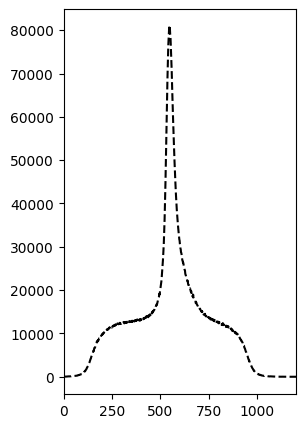

In [30]:
atom  = 79
index = 16
expand = 800 
emit = 100 
vrand = 30


tot_x_K, tot_y_K, tot_x_H, tot_y_H , tot_vx_K,tot_vy_K, tot_vx_H,tot_vy_H, tot_ratio = tot_spectrum(atom,index,expand,emit,vrand)

core_x_K, core_y_K, core_x_H, core_y_H , core_vx_K,core_vy_K, core_vx_H,core_vy_H , core_ratio = core_spectrum(atom,index,expand,emit,vrand)

halo_x_K, halo_y_K, halo_x_H, halo_y_H , halo_vx_K,halo_vy_K, halo_vx_H,halo_vy_H , halo_ratio = halo_spectrum(atom,index,expand,emit,vrand)
fig = plt.figure(1,figsize=(3,5))
plt.plot(tot_vx_K, tot_vy_K,'k--')
print(tot_vy_K.max())
plt.plot(tot_vx_H, tot_vy_H,'k--')
print(tot_vy_H.max())
print(tot_vy_K.max()/tot_vy_H.max() , 23.5 / 30)
plt.xlim(-700,1200)
print(tot_ratio)

48872.0
40940.0
1.1937469467513435 0.7833333333333333
0.6658004801312698


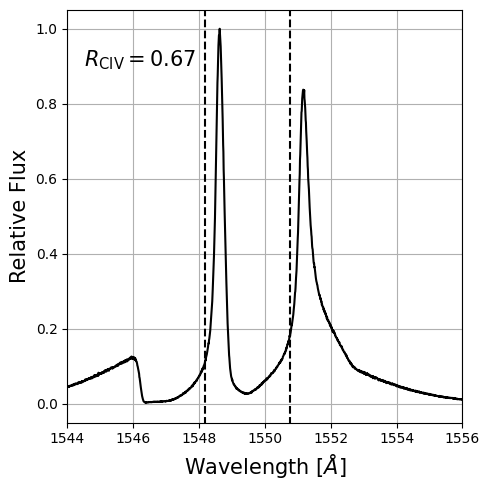

In [4]:
atom  = 32
index = 16
expand = 300 
emit = 500
vrand = 50


tot_x_K, tot_y_K, tot_x_H, tot_y_H , tot_vx_K,tot_vy_K, tot_vx_H,tot_vy_H, tot_ratio = tot_spectrum(atom,index,expand,emit,vrand)

core_x_K, core_y_K, core_x_H, core_y_H , core_vx_K,core_vy_K, core_vx_H,core_vy_H , core_ratio = core_spectrum(atom,index,expand,emit,vrand)

halo_x_K, halo_y_K, halo_x_H, halo_y_H , halo_vx_K,halo_vy_K, halo_vx_H,halo_vy_H , halo_ratio = halo_spectrum(atom,index,expand,emit,vrand)
fig = plt.figure(1,figsize=(5,5))
normal = max(tot_y_K.max(),tot_y_H.max())
plt.plot(tot_x_K, tot_y_K/normal,'k-')
print(tot_vy_K.max())
plt.plot(tot_x_H, tot_y_H/normal,'k-')
print(tot_vy_H.max())
print(tot_vy_K.max()/tot_vy_H.max() , 23.5 / 30)
# plt.xlim(-700,1200)
print(tot_ratio)
# plt.text(-690, 0.9, f'$R_{{\\rm CIV}} = {tot_ratio:.2f}$',size=15)

plt.xlim(1544,1556)
# print(tot_ratio)
plt.text(1544.5, 0.9, f'$R_{{\\rm CIV}} = {tot_ratio:.2f}$',size=15)

# plt.xlabel(r'$\Delta \rm V ~ [\rm km\,s^{-1}]$',fontsize=10)
plt.xlabel('Wavelength $[\AA]$',fontsize=15)
plt.ylabel('Relative Flux',fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# plt.axvline(x=0,ymin=-1,ymax=10,linestyle='--',color='k')
# plt.axvline(x=500,ymin=-1,ymax=10,linestyle='--',color='k')

plt.axvline(x=C_IV_K_A,ymin=-1,ymax=10,linestyle='--',color='k')
plt.axvline(x=C_IV_H_A,ymin=-1,ymax=10,linestyle='--',color='k')
plt.grid()
plt.tight_layout()
plt.savefig(f'/home/jin/바탕화면/BB_WA_Spectrum_{atom}_{index}_{expand}_{emit}_{vrand}.png',bbox_inches='tight')


35593.0
39558.0
0.8997674301026342 0.7833333333333333
0.7071557615435878


Text(1538, 0.8, '$R_{\\rm peak} = 0.90$')

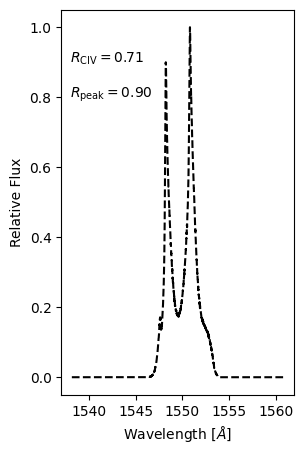

In [5]:
atom  = 13 # 13 - 20 
index = 15
expand = 600 
emit = 100 
vrand = 11.8


tot_x_K, tot_y_K, tot_x_H, tot_y_H , tot_vx_K,tot_vy_K, tot_vx_H,tot_vy_H, tot_ratio = tot_spectrum(atom,index,expand,emit,vrand)

core_x_K, core_y_K, core_x_H, core_y_H , core_vx_K,core_vy_K, core_vx_H,core_vy_H , core_ratio = core_spectrum(atom,index,expand,emit,vrand)

halo_x_K, halo_y_K, halo_x_H, halo_y_H , halo_vx_K,halo_vy_K, halo_vx_H,halo_vy_H , halo_ratio = halo_spectrum(atom,index,expand,emit,vrand)
fig = plt.figure(1,figsize=(3,5))
normal = max(tot_y_K.max(),tot_y_H.max())
plt.plot(tot_x_K, tot_y_K/normal,'k--')
print(tot_vy_K.max())
plt.plot(tot_x_H, tot_y_H/normal,'k--')
print(tot_vy_H.max())
print(tot_vy_K.max()/tot_vy_H.max() , 23.5 / 30)

# plt.xlim(-700,1200)
print(tot_ratio)
plt.xlabel('Wavelength $[\AA]$',fontsize=10)
plt.ylabel('Relative Flux',fontsize=10)
plt.text(1538, 0.9, f'$R_{{\\rm CIV}} = {tot_ratio:.2f}$')
pp = tot_vy_K.max()/tot_vy_H.max() 
plt.text(1538, 0.8, f'$R_{{\\rm peak}} = {pp :.2f}$')

# plt.savefig(f'/home/jin/바탕화면/Spectrum_{atom}_{index}_{expand}_{emit}_{vrand}.png',bbox_inches='tight')

30365.0
34718.0
0.8746183535917967 0.7833333333333333
0.6986882695099677


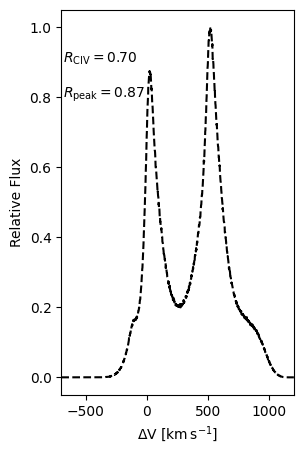

In [6]:
atom  = 13   # 1.3 - 2.0
index = 15
expand = 600 
emit = 100 
vrand = 30  # 30 - 50 


tot_x_K, tot_y_K, tot_x_H, tot_y_H , tot_vx_K,tot_vy_K, tot_vx_H,tot_vy_H, tot_ratio = tot_spectrum(atom,index,expand,emit,vrand)

core_x_K, core_y_K, core_x_H, core_y_H , core_vx_K,core_vy_K, core_vx_H,core_vy_H , core_ratio = core_spectrum(atom,index,expand,emit,vrand)

halo_x_K, halo_y_K, halo_x_H, halo_y_H , halo_vx_K,halo_vy_K, halo_vx_H,halo_vy_H , halo_ratio = halo_spectrum(atom,index,expand,emit,vrand)
fig = plt.figure(1,figsize=(3,5))
normal = max(tot_vy_K.max(),tot_vy_H.max())
plt.plot(tot_vx_K, tot_vy_K/normal,'k--')
print(tot_vy_K.max())
plt.plot(tot_vx_H, tot_vy_H/normal,'k--')
print(tot_vy_H.max())
print(tot_vy_K.max()/tot_vy_H.max() , 23.5 / 30)
plt.xlim(-700,1200)
print(tot_ratio)
plt.xlabel(r'$\Delta \rm V ~ [\rm km\,s^{-1}]$',fontsize=10)
plt.ylabel('Relative Flux',fontsize=10)

plt.text(-690, 0.9, f'$R_{{\\rm CIV}} = {tot_ratio:.2f}$')
pp = tot_vy_K.max()/tot_vy_H.max() 
plt.text(-690, 0.8, f'$R_{{\\rm peak}} = {pp :.2f}$')


plt.savefig(f'/home/jin/바탕화면/Vel_Spectrum_{atom}_{index}_{expand}_{emit}_{vrand}.png',bbox_inches='tight')

30050.0
32105.0
0.9359912786170378 0.7833333333333333
0.7859332347790081
35464.0
35485.0
0.9994082006481612 0.7833333333333333
0.7947478325661925
47982.0
41080.0
1.1680136319376826 0.7833333333333333
0.8129189288840124


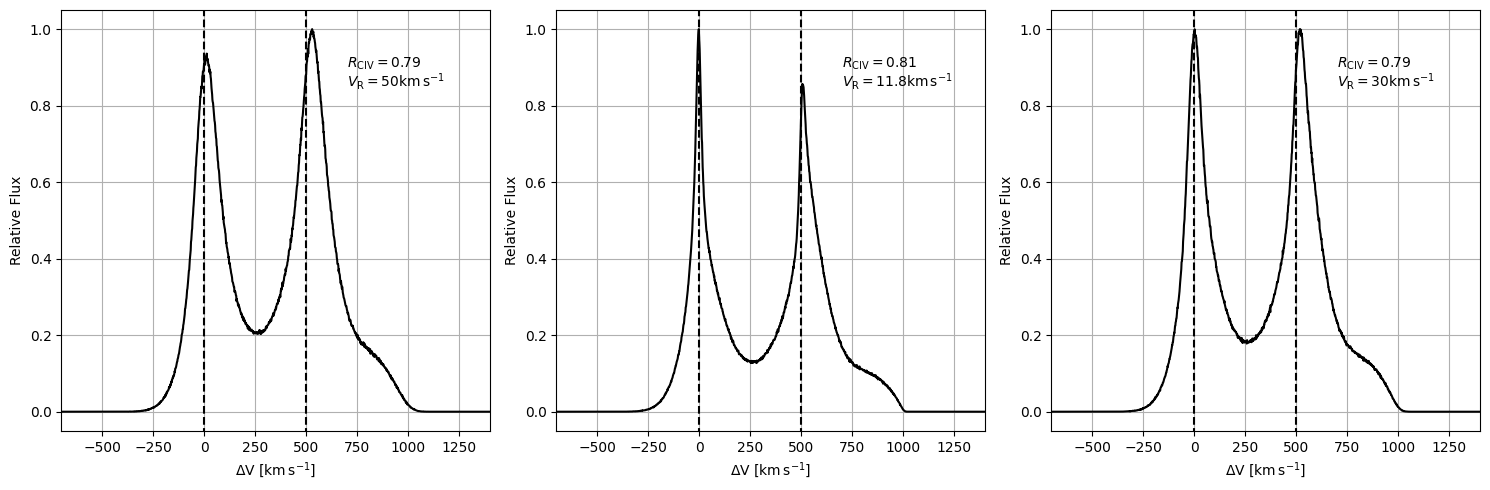

In [7]:
atom  = 13  # 13 - 20
index = 15
expand = 500 
emit = 100 
vrand = 50


tot_x_K, tot_y_K, tot_x_H, tot_y_H , tot_vx_K,tot_vy_K, tot_vx_H,tot_vy_H, tot_ratio = tot_spectrum(atom,index,expand,emit,vrand)

core_x_K, core_y_K, core_x_H, core_y_H , core_vx_K,core_vy_K, core_vx_H,core_vy_H , core_ratio = core_spectrum(atom,index,expand,emit,vrand)

halo_x_K, halo_y_K, halo_x_H, halo_y_H , halo_vx_K,halo_vy_K, halo_vx_H,halo_vy_H , halo_ratio = halo_spectrum(atom,index,expand,emit,vrand)
fig = plt.figure(1,figsize=(15,5))
plt.subplot(131)
normal = max(tot_vy_K.max(),tot_vy_H.max())
plt.plot(tot_vx_K, tot_vy_K/normal,'k-')
print(tot_vy_K.max())
plt.plot(tot_vx_H, tot_vy_H/normal,'k-')
print(tot_vy_H.max())
print(tot_vy_K.max()/tot_vy_H.max() , 23.5 / 30)
# plt.xlim(-700,1200)
print(tot_ratio)
plt.xlabel(r'$\Delta \rm V ~ [\rm km\,s^{-1}]$',fontsize=10)
plt.ylabel('Relative Flux',fontsize=10)
plt.xlim(-700,1400)
plt.text(700, 0.9, f'$R_{{\\rm CIV}} = {tot_ratio:.2f}$')
plt.text(700, 0.85, f'$V_{{\\rm R}} = {vrand} \\rm km\\,s^{{-1}}$')

pp = tot_vy_K.max()/tot_vy_H.max() 
plt.axvline(x=0,ymin=-1,ymax=10,linestyle='--',color='k')
plt.axvline(x=500,ymin=-1,ymax=10,linestyle='--',color='k')
plt.grid()
plt.tight_layout()

plt.subplot(133)
vrand = 30
tot_x_K, tot_y_K, tot_x_H, tot_y_H , tot_vx_K,tot_vy_K, tot_vx_H,tot_vy_H, tot_ratio = tot_spectrum(atom,index,expand,emit,vrand)

normal = max(tot_vy_K.max(),tot_vy_H.max())
plt.plot(tot_vx_K, tot_vy_K/normal,'k-')
print(tot_vy_K.max())
plt.plot(tot_vx_H, tot_vy_H/normal,'k-')
print(tot_vy_H.max())
print(tot_vy_K.max()/tot_vy_H.max() , 23.5 / 30)
# plt.xlim(-700,1200)
print(tot_ratio)
plt.xlabel(r'$\Delta \rm V ~ [\rm km\,s^{-1}]$',fontsize=10)
plt.ylabel('Relative Flux',fontsize=10)
plt.xlim(-700,1400)
plt.text(700, 0.9, f'$R_{{\\rm CIV}} = {tot_ratio:.2f}$')
plt.text(700, 0.85, f'$V_{{\\rm R}} = {vrand} \\rm km\\,s^{{-1}}$')
pp = tot_vy_K.max()/tot_vy_H.max() 
plt.axvline(x=0,ymin=-1,ymax=10,linestyle='--',color='k')
plt.axvline(x=500,ymin=-1,ymax=10,linestyle='--',color='k')
plt.grid()
plt.tight_layout()

plt.subplot(132)
vrand = 11.8
tot_x_K, tot_y_K, tot_x_H, tot_y_H , tot_vx_K,tot_vy_K, tot_vx_H,tot_vy_H, tot_ratio = tot_spectrum(atom,index,expand,emit,vrand)

normal = max(tot_vy_K.max(),tot_vy_H.max())
plt.plot(tot_vx_K, tot_vy_K/normal,'k-')
print(tot_vy_K.max())
plt.plot(tot_vx_H, tot_vy_H/normal,'k-')
print(tot_vy_H.max())
print(tot_vy_K.max()/tot_vy_H.max() , 23.5 / 30)
# plt.xlim(-700,1200)
print(tot_ratio)
plt.xlabel(r'$\Delta \rm V ~ [\rm km\,s^{-1}]$',fontsize=10)
plt.ylabel('Relative Flux',fontsize=10)
plt.xlim(-700,1400)
plt.text(700, 0.9, f'$R_{{\\rm CIV}} = {tot_ratio:.2f}$')
plt.text(700, 0.85, f'$V_{{\\rm R}} = {vrand} \\rm km\\,s^{{-1}}$')
pp = tot_vy_K.max()/tot_vy_H.max() 
plt.axvline(x=0,ymin=-1,ymax=10,linestyle='--',color='k')
plt.axvline(x=500,ymin=-1,ymax=10,linestyle='--',color='k')
plt.grid()
plt.tight_layout()
# plt.savefig(f'/home/jin/바탕화면/Best_Spectrum_{atom}_{index}_{expand}_{emit}_{vrand}.png',bbox_inches='tight')

30050.0
32105.0
0.9359912786170378 0.7833333333333333
0.7859332347790081
19786.0
23674.0
0.8357691982765904 0.7833333333333333
0.7154277041488362
44756.0
47284.0
0.9465358260722443 0.7833333333333333
0.8408304566215956


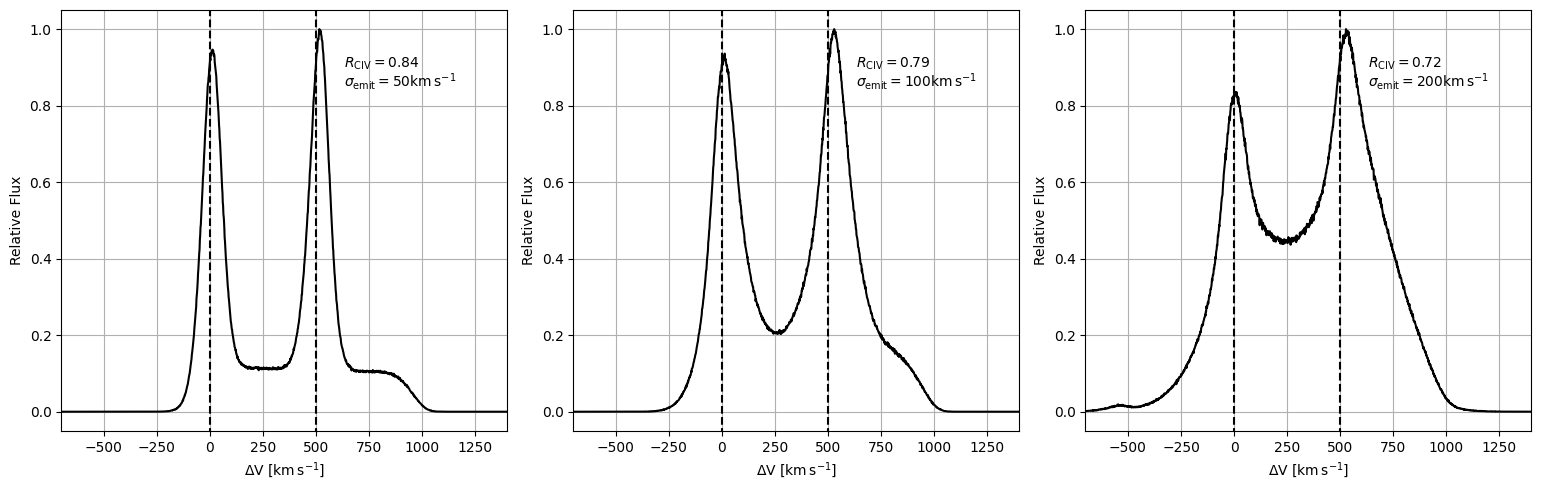

In [8]:
atom  = 13  # 13 - 20
index = 15
expand = 500 
emit = 100 
vrand = 50


tot_x_K, tot_y_K, tot_x_H, tot_y_H , tot_vx_K,tot_vy_K, tot_vx_H,tot_vy_H, tot_ratio = tot_spectrum(atom,index,expand,emit,vrand)

core_x_K, core_y_K, core_x_H, core_y_H , core_vx_K,core_vy_K, core_vx_H,core_vy_H , core_ratio = core_spectrum(atom,index,expand,emit,vrand)

halo_x_K, halo_y_K, halo_x_H, halo_y_H , halo_vx_K,halo_vy_K, halo_vx_H,halo_vy_H , halo_ratio = halo_spectrum(atom,index,expand,emit,vrand)
fig = plt.figure(1,figsize=(15,5))
plt.subplot(132)
normal = max(tot_vy_K.max(),tot_vy_H.max())
plt.plot(tot_vx_K, tot_vy_K/normal,'k-')
print(tot_vy_K.max())
plt.plot(tot_vx_H, tot_vy_H/normal,'k-')
print(tot_vy_H.max())
print(tot_vy_K.max()/tot_vy_H.max() , 23.5 / 30)
# plt.xlim(-700,1200)
print(tot_ratio)
plt.xlabel(r'$\Delta \rm V ~ [\rm km\,s^{-1}]$',fontsize=10)
plt.ylabel('Relative Flux',fontsize=10)
plt.xlim(-700,1400)
plt.text(630, 0.9, f'$R_{{\\rm CIV}} = {tot_ratio:.2f}$')
plt.text(630, 0.85, f'$\\sigma_{{\\rm emit}} = {emit} \\rm km\\,s^{{-1}}$')

pp = tot_vy_K.max()/tot_vy_H.max() 
plt.axvline(x=0,ymin=-1,ymax=10,linestyle='--',color='k')
plt.axvline(x=500,ymin=-1,ymax=10,linestyle='--',color='k')
plt.grid()
plt.tight_layout()

plt.subplot(133)
emit = 200
tot_x_K, tot_y_K, tot_x_H, tot_y_H , tot_vx_K,tot_vy_K, tot_vx_H,tot_vy_H, tot_ratio = tot_spectrum(atom,index,expand,emit,vrand)

normal = max(tot_vy_K.max(),tot_vy_H.max())
plt.plot(tot_vx_K, tot_vy_K/normal,'k-')
print(tot_vy_K.max())
plt.plot(tot_vx_H, tot_vy_H/normal,'k-')
print(tot_vy_H.max())
print(tot_vy_K.max()/tot_vy_H.max() , 23.5 / 30)
# plt.xlim(-700,1200)
print(tot_ratio)
plt.xlabel(r'$\Delta \rm V ~ [\rm km\,s^{-1}]$',fontsize=10)
plt.ylabel('Relative Flux',fontsize=10)
plt.xlim(-700,1400)
plt.text(630, 0.9, f'$R_{{\\rm CIV}} = {tot_ratio:.2f}$')
plt.text(630, 0.85, f'$\\sigma_{{\\rm emit}} = {emit} \\rm km\\,s^{{-1}}$')
pp = tot_vy_K.max()/tot_vy_H.max() 
plt.axvline(x=0,ymin=-1,ymax=10,linestyle='--',color='k')
plt.axvline(x=500,ymin=-1,ymax=10,linestyle='--',color='k')
plt.grid()
plt.tight_layout()

plt.subplot(131)
emit = 50
tot_x_K, tot_y_K, tot_x_H, tot_y_H , tot_vx_K,tot_vy_K, tot_vx_H,tot_vy_H, tot_ratio = tot_spectrum(atom,index,expand,emit,vrand)

normal = max(tot_vy_K.max(),tot_vy_H.max())
plt.plot(tot_vx_K, tot_vy_K/normal,'k-')
print(tot_vy_K.max())
plt.plot(tot_vx_H, tot_vy_H/normal,'k-')
print(tot_vy_H.max())
print(tot_vy_K.max()/tot_vy_H.max() , 23.5 / 30)
# plt.xlim(-700,1200)
print(tot_ratio)
plt.xlabel(r'$\Delta \rm V ~ [\rm km\,s^{-1}]$',fontsize=10)
plt.ylabel('Relative Flux',fontsize=10)
plt.xlim(-700,1400)
plt.text(630, 0.9, f'$R_{{\\rm CIV}} = {tot_ratio:.2f}$')
plt.text(630, 0.85, f'$\\sigma_{{\\rm emit}} = {emit} \\rm km\\,s^{{-1}}$')
pp = tot_vy_K.max()/tot_vy_H.max() 
plt.axvline(x=0,ymin=-1,ymax=10,linestyle='--',color='k')
plt.axvline(x=500,ymin=-1,ymax=10,linestyle='--',color='k')
plt.grid()
# plt.tight_layout()
# plt.savefig(f'/home/jin/바탕화면/Emit_Spectrum_{atom}_{index}_{expand}_{emit}_{vrand}.png',bbox_inches='tight')

47982.0
41080.0
1.1680136319376826 0.7833333333333333
0.8129189288840124
35593.0
39558.0
0.8997674301026342 0.7833333333333333
0.7071557615435878
38010.0
37490.0
1.0138703654307815 0.7833333333333333
0.7596131507515258
35464.0
35485.0
0.9994082006481612 0.7833333333333333
0.7947478325661925
30365.0
34718.0
0.8746183535917967 0.7833333333333333
0.6986882695099677
32836.0
33135.0
0.9909763090387808 0.7833333333333333
0.7517933012491529
30050.0
32105.0
0.9359912786170378 0.7833333333333333
0.7859332347790081
26937.0
31637.0
0.8514397698896862 0.7833333333333333
0.6961390128889007
29181.0
30464.0
0.9578847163865546 0.7833333333333333
0.7456369066712474


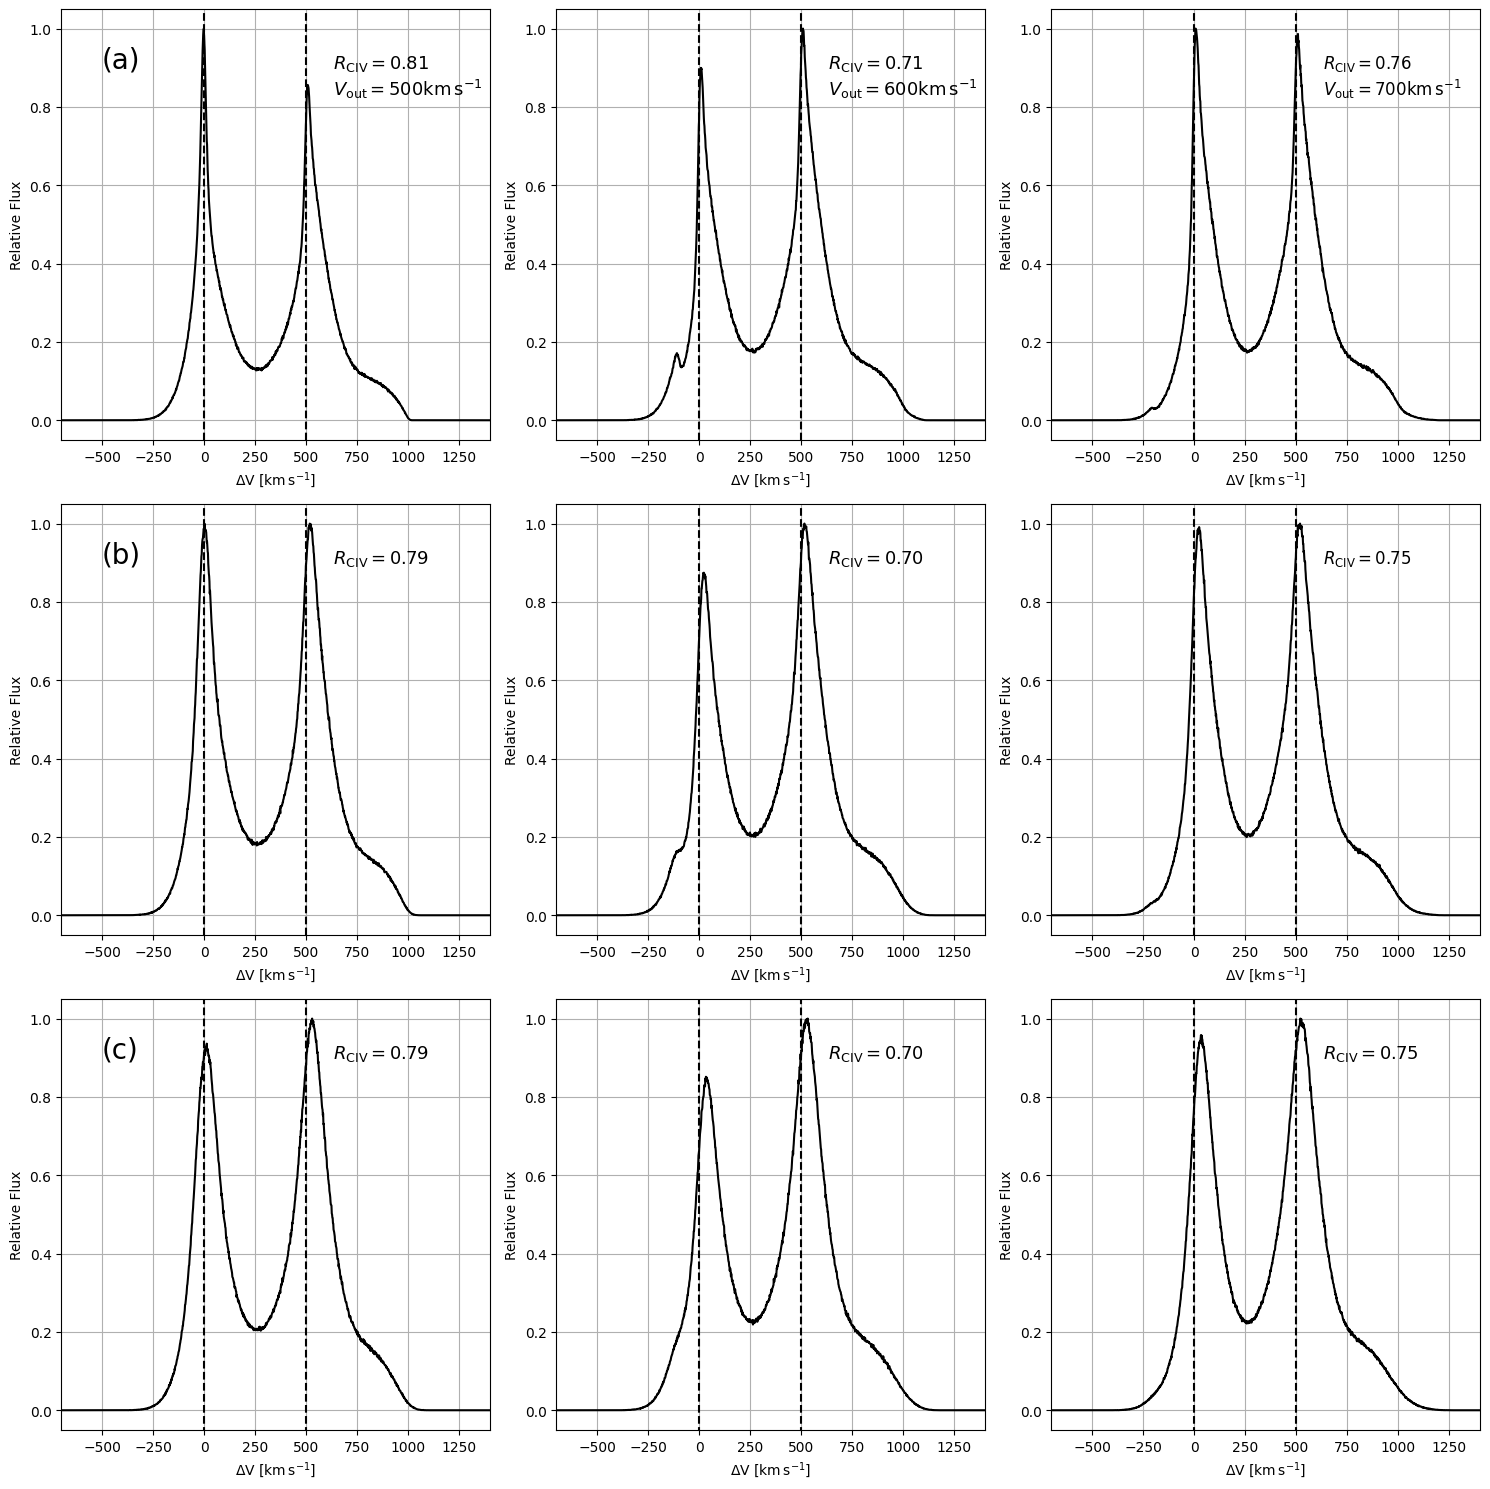

In [9]:



tot_x_K, tot_y_K, tot_x_H, tot_y_H , tot_vx_K,tot_vy_K, tot_vx_H,tot_vy_H, tot_ratio = tot_spectrum(atom,index,expand,emit,vrand)

core_x_K, core_y_K, core_x_H, core_y_H , core_vx_K,core_vy_K, core_vx_H,core_vy_H , core_ratio = core_spectrum(atom,index,expand,emit,vrand)

halo_x_K, halo_y_K, halo_x_H, halo_y_H , halo_vx_K,halo_vy_K, halo_vx_H,halo_vy_H , halo_ratio = halo_spectrum(atom,index,expand,emit,vrand)
fig = plt.figure(1,figsize=(15,15))

plt.subplot(331)

atom  = 13  # 13 - 20
index = 15
expand = 500 
emit = 100 
vrand = 11.8
tot_x_K, tot_y_K, tot_x_H, tot_y_H , tot_vx_K,tot_vy_K, tot_vx_H,tot_vy_H, tot_ratio = tot_spectrum(atom,index,expand,emit,vrand)

normal = max(tot_vy_K.max(),tot_vy_H.max())
plt.plot(tot_vx_K, tot_vy_K/normal,'k-')
print(tot_vy_K.max())
plt.plot(tot_vx_H, tot_vy_H/normal,'k-')
print(tot_vy_H.max())
print(tot_vy_K.max()/tot_vy_H.max() , 23.5 / 30)
# plt.xlim(-700,1200)
print(tot_ratio)
plt.xlabel(r'$\Delta \rm V ~ [\rm km\,s^{-1}]$',fontsize=10)
plt.ylabel('Relative Flux',fontsize=10)
plt.xlim(-700,1400)
plt.text(630, 0.9, f'$R_{{\\rm CIV}} = {tot_ratio:.2f}$',size=13)
plt.text(630, 0.83, f'$V_{{\\rm out}} = {expand} \\rm km\\,s^{{-1}}$',size=13)
plt.text(-500, 0.9, '(a)',size=20)


pp = tot_vy_K.max()/tot_vy_H.max() 
plt.axvline(x=0,ymin=-1,ymax=10,linestyle='--',color='k')
plt.axvline(x=500,ymin=-1,ymax=10,linestyle='--',color='k')
plt.grid()
plt.tight_layout()

plt.subplot(332)
expand = 600 
tot_x_K, tot_y_K, tot_x_H, tot_y_H , tot_vx_K,tot_vy_K, tot_vx_H,tot_vy_H, tot_ratio = tot_spectrum(atom,index,expand,emit,vrand)

normal = max(tot_vy_K.max(),tot_vy_H.max())
plt.plot(tot_vx_K, tot_vy_K/normal,'k-')
print(tot_vy_K.max())
plt.plot(tot_vx_H, tot_vy_H/normal,'k-')
print(tot_vy_H.max())
print(tot_vy_K.max()/tot_vy_H.max() , 23.5 / 30)
# plt.xlim(-700,1200)
print(tot_ratio)
plt.xlabel(r'$\Delta \rm V ~ [\rm km\,s^{-1}]$',fontsize=10)
plt.ylabel('Relative Flux',fontsize=10)
plt.xlim(-700,1400)
plt.text(630, 0.9, f'$R_{{\\rm CIV}} = {tot_ratio:.2f}$',size=13)
plt.text(630, 0.83, f'$V_{{\\rm out}} = {expand} \\rm km\\,s^{{-1}}$',size=13)
pp = tot_vy_K.max()/tot_vy_H.max() 
plt.axvline(x=0,ymin=-1,ymax=10,linestyle='--',color='k')
plt.axvline(x=500,ymin=-1,ymax=10,linestyle='--',color='k')
plt.grid()
plt.tight_layout()

plt.subplot(333)
expand = 700 
tot_x_K, tot_y_K, tot_x_H, tot_y_H , tot_vx_K,tot_vy_K, tot_vx_H,tot_vy_H, tot_ratio = tot_spectrum(atom,index,expand,emit,vrand)

normal = max(tot_vy_K.max(),tot_vy_H.max())
plt.plot(tot_vx_K, tot_vy_K/normal,'k-')
print(tot_vy_K.max())
plt.plot(tot_vx_H, tot_vy_H/normal,'k-')
print(tot_vy_H.max())
print(tot_vy_K.max()/tot_vy_H.max() , 23.5 / 30)
# plt.xlim(-700,1200)
print(tot_ratio)
plt.xlabel(r'$\Delta \rm V ~ [\rm km\,s^{-1}]$',fontsize=10)
plt.ylabel('Relative Flux',fontsize=10)
plt.xlim(-700,1400)
plt.text(630, 0.9, f'$R_{{\\rm CIV}} = {tot_ratio:.2f}$',size=12)
plt.text(630, 0.83, f'$V_{{\\rm out}} = {expand} \\rm km\\,s^{{-1}}$',size=12)
# plt.text(630, 0.76, f'$\\sigma_{{\\rm emit}} = {emit} \\rm km\\,s^{{-1}}$',size=12)
# plt.text(630, 0.69, f'$N_{{\\rm CIV}} = {atom/10} \\times 10^{{{index}}} \\rm cm^{{-2}}$',size=10)

pp = tot_vy_K.max()/tot_vy_H.max() 
plt.axvline(x=0,ymin=-1,ymax=10,linestyle='--',color='k')
plt.axvline(x=500,ymin=-1,ymax=10,linestyle='--',color='k')
plt.grid()
plt.tight_layout()



expand = 500 
emit = 100 
vrand = 30

plt.subplot(334)
tot_x_K, tot_y_K, tot_x_H, tot_y_H , tot_vx_K,tot_vy_K, tot_vx_H,tot_vy_H, tot_ratio = tot_spectrum(atom,index,expand,emit,vrand)
normal = max(tot_vy_K.max(),tot_vy_H.max())
plt.plot(tot_vx_K, tot_vy_K/normal,'k-')
print(tot_vy_K.max())
plt.plot(tot_vx_H, tot_vy_H/normal,'k-')
print(tot_vy_H.max())
print(tot_vy_K.max()/tot_vy_H.max() , 23.5 / 30)
# plt.xlim(-700,1200)
print(tot_ratio)
plt.xlabel(r'$\Delta \rm V ~ [\rm km\,s^{-1}]$',fontsize=10)
plt.ylabel('Relative Flux',fontsize=10)
plt.xlim(-700,1400)
plt.text(630, 0.9, f'$R_{{\\rm CIV}} = {tot_ratio:.2f}$',size=13)
# plt.text(630, 0.83, f'$V_{{\\rm out}} = {expand} \\rm km\\,s^{{-1}}$',size=13)
plt.text(-500, 0.9, '(b)',size=20)
pp = tot_vy_K.max()/tot_vy_H.max() 
plt.axvline(x=0,ymin=-1,ymax=10,linestyle='--',color='k')
plt.axvline(x=500,ymin=-1,ymax=10,linestyle='--',color='k')
plt.grid()
plt.tight_layout()

plt.subplot(335)
expand = 600 
tot_x_K, tot_y_K, tot_x_H, tot_y_H , tot_vx_K,tot_vy_K, tot_vx_H,tot_vy_H, tot_ratio = tot_spectrum(atom,index,expand,emit,vrand)

normal = max(tot_vy_K.max(),tot_vy_H.max())
plt.plot(tot_vx_K, tot_vy_K/normal,'k-')
print(tot_vy_K.max())
plt.plot(tot_vx_H, tot_vy_H/normal,'k-')
print(tot_vy_H.max())
print(tot_vy_K.max()/tot_vy_H.max() , 23.5 / 30)
# plt.xlim(-700,1200)
print(tot_ratio)
plt.xlabel(r'$\Delta \rm V ~ [\rm km\,s^{-1}]$',fontsize=10)
plt.ylabel('Relative Flux',fontsize=10)
plt.xlim(-700,1400)
plt.text(630, 0.9, f'$R_{{\\rm CIV}} = {tot_ratio:.2f}$',size=13)
# plt.text(630, 0.83, f'$V_{{\\rm out}} = {expand} \\rm km\\,s^{{-1}}$',size=13)
pp = tot_vy_K.max()/tot_vy_H.max() 
plt.axvline(x=0,ymin=-1,ymax=10,linestyle='--',color='k')
plt.axvline(x=500,ymin=-1,ymax=10,linestyle='--',color='k')
plt.grid()
plt.tight_layout()

plt.subplot(336)
expand = 700 
tot_x_K, tot_y_K, tot_x_H, tot_y_H , tot_vx_K,tot_vy_K, tot_vx_H,tot_vy_H, tot_ratio = tot_spectrum(atom,index,expand,emit,vrand)

normal = max(tot_vy_K.max(),tot_vy_H.max())
plt.plot(tot_vx_K, tot_vy_K/normal,'k-')
print(tot_vy_K.max())
plt.plot(tot_vx_H, tot_vy_H/normal,'k-')
print(tot_vy_H.max())
print(tot_vy_K.max()/tot_vy_H.max() , 23.5 / 30)
# plt.xlim(-700,1200)
print(tot_ratio)
plt.xlabel(r'$\Delta \rm V ~ [\rm km\,s^{-1}]$',fontsize=10)
plt.ylabel('Relative Flux',fontsize=10)
plt.xlim(-700,1400)
plt.text(630, 0.9, f'$R_{{\\rm CIV}} = {tot_ratio:.2f}$',size=12)
# plt.text(630, 0.83, f'$V_{{\\rm out}} = {expand} \\rm km\\,s^{{-1}}$',size=12)
# plt.text(630, 0.76, f'$\\sigma_{{\\rm emit}} = {emit} \\rm km\\,s^{{-1}}$',size=12)
# plt.text(630, 0.69, f'$N_{{\\rm CIV}} = {atom/10} \\times 10^{{{index}}} \\rm cm^{{-2}}$',size=10)

pp = tot_vy_K.max()/tot_vy_H.max() 
plt.axvline(x=0,ymin=-1,ymax=10,linestyle='--',color='k')
plt.axvline(x=500,ymin=-1,ymax=10,linestyle='--',color='k')
plt.grid()
plt.tight_layout()



expand = 500 
emit = 100 
vrand = 50

plt.subplot(337)

expand = 500 
emit = 100 
vrand = 50
tot_x_K, tot_y_K, tot_x_H, tot_y_H , tot_vx_K,tot_vy_K, tot_vx_H,tot_vy_H, tot_ratio = tot_spectrum(atom,index,expand,emit,vrand)
normal = max(tot_vy_K.max(),tot_vy_H.max())
plt.plot(tot_vx_K, tot_vy_K/normal,'k-')
print(tot_vy_K.max())
plt.plot(tot_vx_H, tot_vy_H/normal,'k-')
print(tot_vy_H.max())
print(tot_vy_K.max()/tot_vy_H.max() , 23.5 / 30)
# plt.xlim(-700,1200)
print(tot_ratio)
plt.xlabel(r'$\Delta \rm V ~ [\rm km\,s^{-1}]$',fontsize=10)
plt.ylabel('Relative Flux',fontsize=10)
plt.xlim(-700,1400)
plt.text(630, 0.9, f'$R_{{\\rm CIV}} = {tot_ratio:.2f}$',size=13)
plt.text(-500, 0.9, '(c)',size=20)
# plt.text(630, 0.83, f'$V_{{\\rm out}} = {expand} \\rm km\\,s^{{-1}}$',size=13)

pp = tot_vy_K.max()/tot_vy_H.max() 
plt.axvline(x=0,ymin=-1,ymax=10,linestyle='--',color='k')
plt.axvline(x=500,ymin=-1,ymax=10,linestyle='--',color='k')
plt.grid()
plt.tight_layout()

plt.subplot(338)
expand = 600 
tot_x_K, tot_y_K, tot_x_H, tot_y_H , tot_vx_K,tot_vy_K, tot_vx_H,tot_vy_H, tot_ratio = tot_spectrum(atom,index,expand,emit,vrand)

normal = max(tot_vy_K.max(),tot_vy_H.max())
plt.plot(tot_vx_K, tot_vy_K/normal,'k-')
print(tot_vy_K.max())
plt.plot(tot_vx_H, tot_vy_H/normal,'k-')
print(tot_vy_H.max())
print(tot_vy_K.max()/tot_vy_H.max() , 23.5 / 30)
# plt.xlim(-700,1200)
print(tot_ratio)
plt.xlabel(r'$\Delta \rm V ~ [\rm km\,s^{-1}]$',fontsize=10)
plt.ylabel('Relative Flux',fontsize=10)
plt.xlim(-700,1400)
plt.text(630, 0.9, f'$R_{{\\rm CIV}} = {tot_ratio:.2f}$',size=13)
# plt.text(630, 0.83, f'$V_{{\\rm out}} = {expand} \\rm km\\,s^{{-1}}$',size=13)
pp = tot_vy_K.max()/tot_vy_H.max() 
plt.axvline(x=0,ymin=-1,ymax=10,linestyle='--',color='k')
plt.axvline(x=500,ymin=-1,ymax=10,linestyle='--',color='k')
plt.grid()
plt.tight_layout()

plt.subplot(339)
expand = 700 
atom= 13
tot_x_K, tot_y_K, tot_x_H, tot_y_H , tot_vx_K,tot_vy_K, tot_vx_H,tot_vy_H, tot_ratio = tot_spectrum(atom,index,expand,emit,vrand)

normal = max(tot_vy_K.max(),tot_vy_H.max())
plt.plot(tot_vx_K, tot_vy_K/normal,'k-')
print(tot_vy_K.max())
plt.plot(tot_vx_H, tot_vy_H/normal,'k-')
print(tot_vy_H.max())
print(tot_vy_K.max()/tot_vy_H.max() , 23.5 / 30)
# plt.xlim(-700,1200)
print(tot_ratio)
plt.xlabel(r'$\Delta \rm V ~ [\rm km\,s^{-1}]$',fontsize=10)
plt.ylabel('Relative Flux',fontsize=10)
plt.xlim(-700,1400)
plt.text(630, 0.9, f'$R_{{\\rm CIV}} = {tot_ratio:.2f}$',size=13)
# plt.text(630, 0.83, f'$V_{{\\rm out}} = {expand} \\rm km\\,s^{{-1}}$',size=13)
# plt.text(630, 0.76, f'$\\sigma_{{\\rm emit}} = {emit} \\rm km\\,s^{{-1}}$',size=12)
# plt.text(630, 0.69, f'$N_{{\\rm CIV}} = {atom/10} \\times 10^{{{index}}} \\rm cm^{{-2}}$',size=10)

pp = tot_vy_K.max()/tot_vy_H.max() 
plt.axvline(x=0,ymin=-1,ymax=10,linestyle='--',color='k')
plt.axvline(x=500,ymin=-1,ymax=10,linestyle='--',color='k')
plt.grid()
plt.tight_layout()


# plt.savefig(f'/home/jin/바탕화면/Spectra_Vrand_various.png',bbox_inches='tight')

Topping 20pc paper

15721.0
44413.0
0.35397293585211537 0.7833333333333333
0.3387586427538448
18495.0
42523.0
0.4349410907038544 0.7833333333333333
0.38400351640488806
20988.0
40789.0
0.5145504915540955 0.7833333333333333
0.4290852533449067
10733.0
49556.0
0.21658325934296555 0.7833333333333333
0.22586341591735912
10436.0
47963.0
0.21758438796572357 0.7833333333333333
0.2520146411428555
11833.0
46397.0
0.2550380412526672 0.7833333333333333
0.27942494523346056
11345.0
54981.0
0.20634400974882233 0.7833333333333333
0.16893486069714803
11187.0
53437.0
0.2093493272451672 0.7833333333333333
0.17989599304484716
11016.0
51965.0
0.21198883864139326 0.7833333333333333
0.1927019961902143


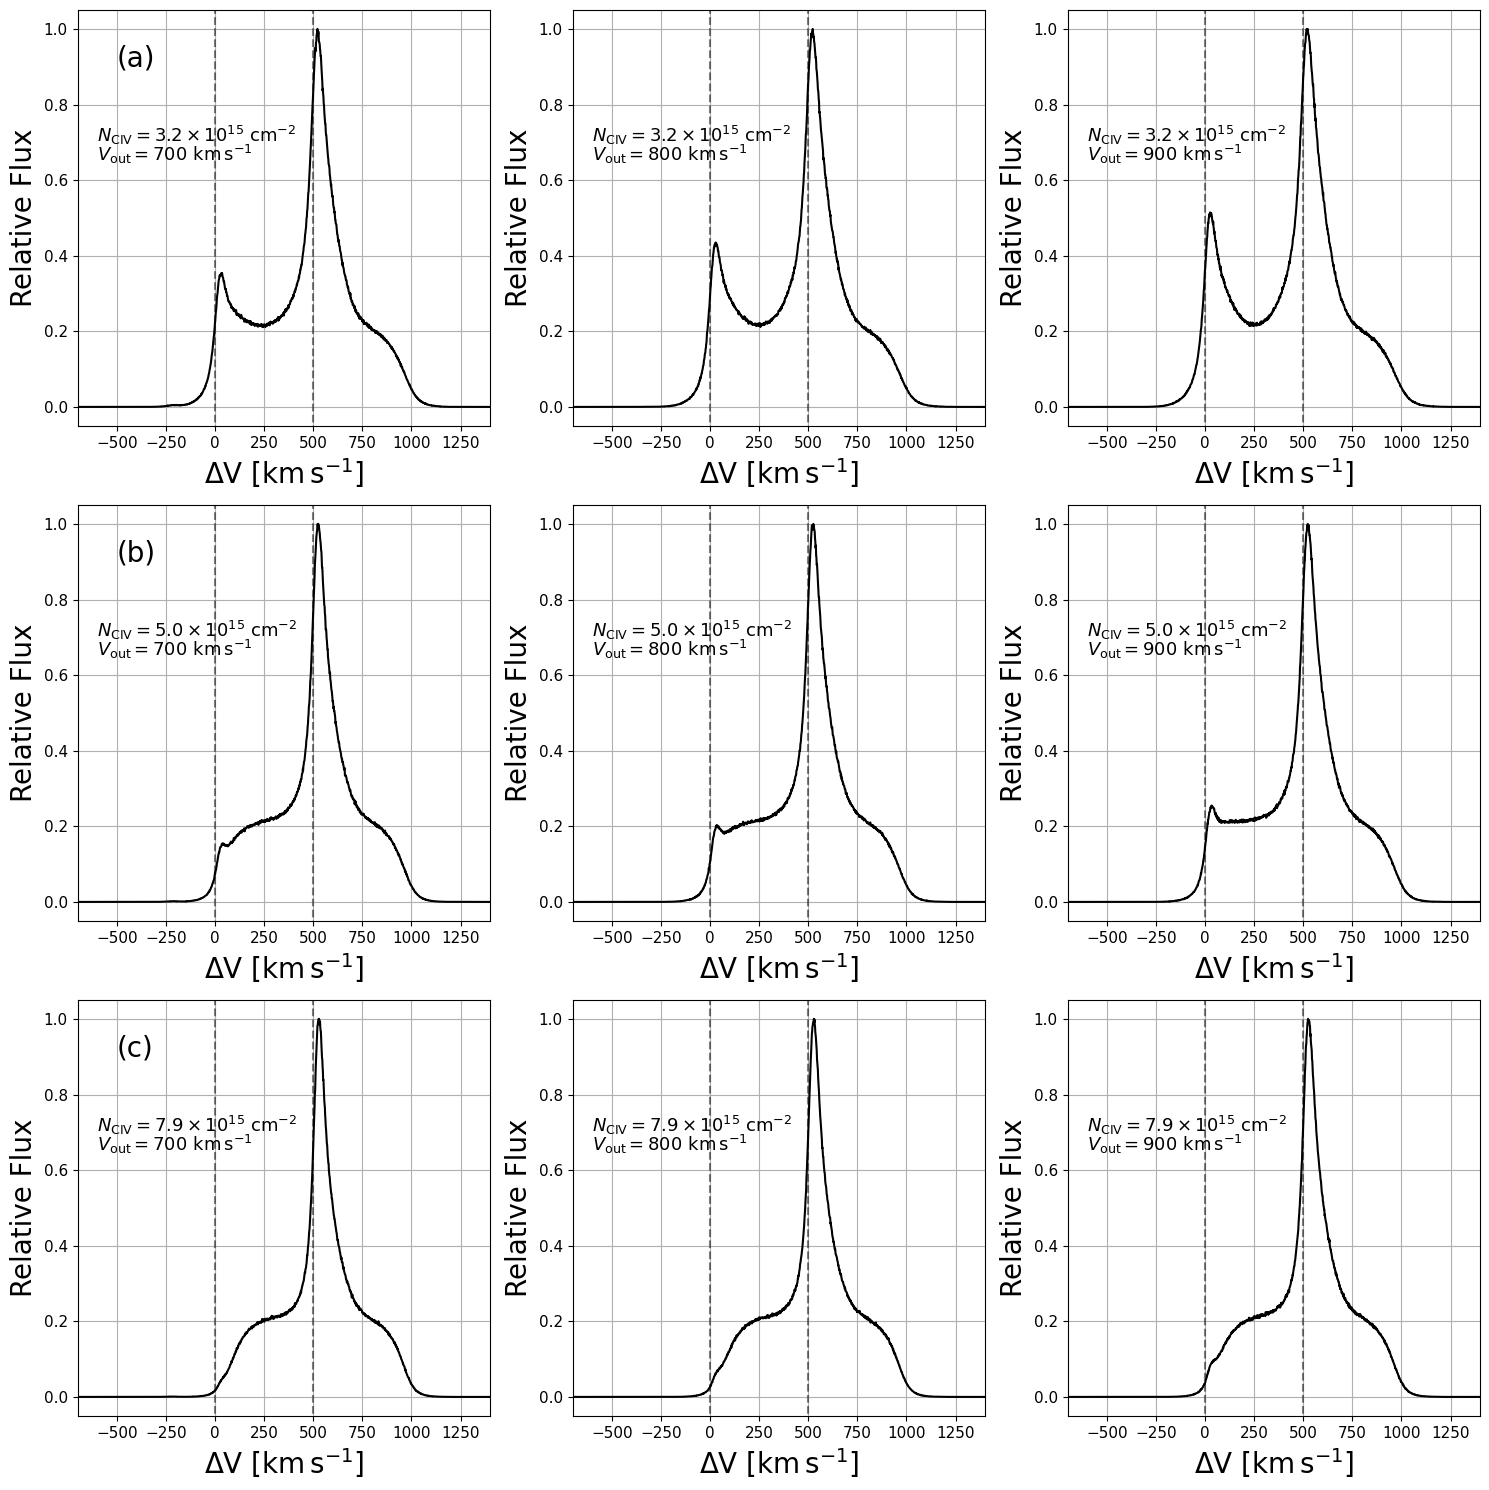

In [72]:



tot_x_K, tot_y_K, tot_x_H, tot_y_H , tot_vx_K,tot_vy_K, tot_vx_H,tot_vy_H, tot_ratio = tot_spectrum(atom,index,expand,emit,vrand)

core_x_K, core_y_K, core_x_H, core_y_H , core_vx_K,core_vy_K, core_vx_H,core_vy_H , core_ratio = core_spectrum(atom,index,expand,emit,vrand)

halo_x_K, halo_y_K, halo_x_H, halo_y_H , halo_vx_K,halo_vy_K, halo_vx_H,halo_vy_H , halo_ratio = halo_spectrum(atom,index,expand,emit,vrand)
fig = plt.figure(1,figsize=(15,15))

plt.subplot(331)

atom  = 32  # 13 - 20
index = 15
expand = 700 
emit = 100 
vrand = 30
tot_x_K, tot_y_K, tot_x_H, tot_y_H , tot_vx_K,tot_vy_K, tot_vx_H,tot_vy_H, tot_ratio = tot_spectrum(atom,index,expand,emit,vrand)

normal = max(tot_vy_K.max(),tot_vy_H.max())
plt.plot(tot_vx_K, tot_vy_K/normal,'k-')
print(tot_vy_K.max())
plt.plot(tot_vx_H, tot_vy_H/normal,'k-')
print(tot_vy_H.max())
print(tot_vy_K.max()/tot_vy_H.max() , 23.5 / 30)
# plt.xlim(-700,1200)
print(tot_ratio)
plt.xlabel(r'$\Delta \rm V ~ [\rm km\,s^{-1}]$',fontsize=20)
plt.ylabel('Relative Flux',fontsize=20)
plt.xlim(-700,1400)
plt.text(-600, 0.7, f'$N_{{\\rm CIV}} = {atom/10} \\times 10^{{{index}}} ~\\rm cm^{{-2}}$',size=13)
plt.text(-600, 0.65, f'$V_{{\\rm out}} = {expand} ~\\rm km\\,s^{{-1}}$',size=13)
plt.text(-500, 0.9, '(a)',size=20)


pp = tot_vy_K.max()/tot_vy_H.max() 
plt.axvline(x=0,ymin=-1,ymax=10,linestyle='--',color='k',alpha=0.5)
plt.axvline(x=500,ymin=-1,ymax=10,linestyle='--',color='k',alpha=0.5)
plt.grid()
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.tight_layout()

plt.subplot(332)
expand = 800 
tot_x_K, tot_y_K, tot_x_H, tot_y_H , tot_vx_K,tot_vy_K, tot_vx_H,tot_vy_H, tot_ratio = tot_spectrum(atom,index,expand,emit,vrand)

normal = max(tot_vy_K.max(),tot_vy_H.max())
plt.plot(tot_vx_K, tot_vy_K/normal,'k-')
print(tot_vy_K.max())
plt.plot(tot_vx_H, tot_vy_H/normal,'k-')
print(tot_vy_H.max())
print(tot_vy_K.max()/tot_vy_H.max() , 23.5 / 30)
# plt.xlim(-700,1200)
print(tot_ratio)
plt.xlabel(r'$\Delta \rm V ~ [\rm km\,s^{-1}]$',fontsize=20)
plt.ylabel('Relative Flux',fontsize=20)
plt.xlim(-700,1400)
plt.text(-600, 0.7, f'$N_{{\\rm CIV}} = {atom/10} \\times 10^{{{index}}} ~\\rm cm^{{-2}}$',size=13)
plt.text(-600, 0.65, f'$V_{{\\rm out}} = {expand} ~\\rm km\\,s^{{-1}}$',size=13)
pp = tot_vy_K.max()/tot_vy_H.max() 
plt.axvline(x=0,ymin=-1,ymax=10,linestyle='--',color='k',alpha=0.5)
plt.axvline(x=500,ymin=-1,ymax=10,linestyle='--',color='k',alpha=0.5)
plt.grid()
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.tight_layout()

plt.subplot(333)
expand = 900 
tot_x_K, tot_y_K, tot_x_H, tot_y_H , tot_vx_K,tot_vy_K, tot_vx_H,tot_vy_H, tot_ratio = tot_spectrum(atom,index,expand,emit,vrand)

normal = max(tot_vy_K.max(),tot_vy_H.max())
plt.plot(tot_vx_K, tot_vy_K/normal,'k-')
print(tot_vy_K.max())
plt.plot(tot_vx_H, tot_vy_H/normal,'k-')
print(tot_vy_H.max())
print(tot_vy_K.max()/tot_vy_H.max() , 23.5 / 30)
# plt.xlim(-700,1200)
print(tot_ratio)
plt.xlabel(r'$\Delta \rm V ~ [\rm km\,s^{-1}]$',fontsize=20)
plt.ylabel('Relative Flux',fontsize=20)
plt.xlim(-700,1400)
plt.text(-600, 0.7, f'$N_{{\\rm CIV}} = {atom/10} \\times 10^{{{index}}} ~\\rm cm^{{-2}}$',size=13)
plt.text(-600, 0.65, f'$V_{{\\rm out}} = {expand} ~\\rm km\\,s^{{-1}}$',size=13)
# plt.text(630, 0.76, f'$\\sigma_{{\\rm emit}} = {emit} \\rm km\\,s^{{-1}}$',size=12)
# plt.text(630, 0.69, f'$N_{{\\rm CIV}} = {atom/10} \\times 10^{{{index}}} \\rm cm^{{-2}}$',size=10)

pp = tot_vy_K.max()/tot_vy_H.max() 
plt.axvline(x=0,ymin=-1,ymax=10,linestyle='--',color='k',alpha=0.5)
plt.axvline(x=500,ymin=-1,ymax=10,linestyle='--',color='k',alpha=0.5)
plt.grid()
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.tight_layout()


expand = 700  
atom  = 50  # 13 - 20

plt.subplot(334)
tot_x_K, tot_y_K, tot_x_H, tot_y_H , tot_vx_K,tot_vy_K, tot_vx_H,tot_vy_H, tot_ratio = tot_spectrum(atom,index,expand,emit,vrand)
normal = max(tot_vy_K.max(),tot_vy_H.max())
plt.plot(tot_vx_K, tot_vy_K/normal,'k-')
print(tot_vy_K.max())
plt.plot(tot_vx_H, tot_vy_H/normal,'k-')
print(tot_vy_H.max())
print(tot_vy_K.max()/tot_vy_H.max() , 23.5 / 30)
# plt.xlim(-700,1200)
print(tot_ratio)
plt.xlabel(r'$\Delta \rm V ~ [\rm km\,s^{-1}]$',fontsize=20)
plt.ylabel('Relative Flux',fontsize=20)
plt.xlim(-700,1400)
plt.text(-600, 0.7, f'$N_{{\\rm CIV}} = {atom/10} \\times 10^{{{index}}} ~\\rm cm^{{-2}}$',size=13)
plt.text(-600, 0.65, f'$V_{{\\rm out}} = {expand} ~\\rm km\\,s^{{-1}}$',size=13)
plt.text(-500, 0.9, '(b)',size=20)
pp = tot_vy_K.max()/tot_vy_H.max() 
plt.axvline(x=0,ymin=-1,ymax=10,linestyle='--',color='k',alpha=0.5)
plt.axvline(x=500,ymin=-1,ymax=10,linestyle='--',color='k',alpha=0.5)
plt.grid()
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.tight_layout()

plt.subplot(335)
expand = 800 
tot_x_K, tot_y_K, tot_x_H, tot_y_H , tot_vx_K,tot_vy_K, tot_vx_H,tot_vy_H, tot_ratio = tot_spectrum(atom,index,expand,emit,vrand)

normal = max(tot_vy_K.max(),tot_vy_H.max())
plt.plot(tot_vx_K, tot_vy_K/normal,'k-')
print(tot_vy_K.max())
plt.plot(tot_vx_H, tot_vy_H/normal,'k-')
print(tot_vy_H.max())
print(tot_vy_K.max()/tot_vy_H.max() , 23.5 / 30)
# plt.xlim(-700,1200)
print(tot_ratio)
plt.xlabel(r'$\Delta \rm V ~ [\rm km\,s^{-1}]$',fontsize=20)
plt.ylabel('Relative Flux',fontsize=20)
plt.xlim(-700,1400)
plt.text(-600, 0.7, f'$N_{{\\rm CIV}} = {atom/10} \\times 10^{{{index}}} ~\\rm cm^{{-2}}$',size=13)
plt.text(-600, 0.65, f'$V_{{\\rm out}} = {expand} ~\\rm km\\,s^{{-1}}$',size=13)
pp = tot_vy_K.max()/tot_vy_H.max() 
plt.axvline(x=0,ymin=-1,ymax=10,linestyle='--',color='k',alpha=0.5)
plt.axvline(x=500,ymin=-1,ymax=10,linestyle='--',color='k',alpha=0.5)
plt.grid()
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.tight_layout()
plt.subplot(336)
expand = 900 
tot_x_K, tot_y_K, tot_x_H, tot_y_H , tot_vx_K,tot_vy_K, tot_vx_H,tot_vy_H, tot_ratio = tot_spectrum(atom,index,expand,emit,vrand)

normal = max(tot_vy_K.max(),tot_vy_H.max())
plt.plot(tot_vx_K, tot_vy_K/normal,'k-')
print(tot_vy_K.max())
plt.plot(tot_vx_H, tot_vy_H/normal,'k-')
print(tot_vy_H.max())
print(tot_vy_K.max()/tot_vy_H.max() , 23.5 / 30)
# plt.xlim(-700,1200)
print(tot_ratio)
plt.xlabel(r'$\Delta \rm V ~ [\rm km\,s^{-1}]$',fontsize=20)
plt.ylabel('Relative Flux',fontsize=20)
plt.xlim(-700,1400)
plt.text(-600, 0.7, f'$N_{{\\rm CIV}} = {atom/10} \\times 10^{{{index}}} ~\\rm cm^{{-2}}$',size=13)
plt.text(-600, 0.65, f'$V_{{\\rm out}} = {expand} ~\\rm km\\,s^{{-1}}$',size=13)
# plt.text(630, 0.76, f'$\\sigma_{{\\rm emit}} = {emit} \\rm km\\,s^{{-1}}$',size=12)
# plt.text(630, 0.69, f'$N_{{\\rm CIV}} = {atom/10} \\times 10^{{{index}}} \\rm cm^{{-2}}$',size=10)

pp = tot_vy_K.max()/tot_vy_H.max() 
plt.axvline(x=0,ymin=-1,ymax=10,linestyle='--',color='k',alpha=0.5)
plt.axvline(x=500,ymin=-1,ymax=10,linestyle='--',color='k',alpha=0.5)
plt.grid()
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.tight_layout()


expand = 700
atom = 79

plt.subplot(337)

expand = 700
atom = 79

tot_x_K, tot_y_K, tot_x_H, tot_y_H , tot_vx_K,tot_vy_K, tot_vx_H,tot_vy_H, tot_ratio = tot_spectrum(atom,index,expand,emit,vrand)
normal = max(tot_vy_K.max(),tot_vy_H.max())
plt.plot(tot_vx_K, tot_vy_K/normal,'k-')
print(tot_vy_K.max())
plt.plot(tot_vx_H, tot_vy_H/normal,'k-')
print(tot_vy_H.max())
print(tot_vy_K.max()/tot_vy_H.max() , 23.5 / 30)
# plt.xlim(-700,1200)
print(tot_ratio)
plt.xlabel(r'$\Delta \rm V ~ [\rm km\,s^{-1}]$',fontsize=20)
plt.ylabel('Relative Flux',fontsize=20)
plt.xlim(-700,1400)
plt.text(-600, 0.7, f'$N_{{\\rm CIV}} = {atom/10} \\times 10^{{{index}}} ~\\rm cm^{{-2}}$',size=13)
plt.text(-600, 0.65, f'$V_{{\\rm out}} = {expand} ~\\rm km\\,s^{{-1}}$',size=13)
plt.text(-500, 0.9, '(c)',size=20)
# plt.text(-600, 0.65, f'$V_{{\\rm out}} = {expand} ~\\rm km\\,s^{{-1}}$',size=13)

pp = tot_vy_K.max()/tot_vy_H.max() 
plt.axvline(x=0,ymin=-1,ymax=10,linestyle='--',color='k',alpha=0.5)
plt.axvline(x=500,ymin=-1,ymax=10,linestyle='--',color='k',alpha=0.5)
plt.grid()
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.tight_layout()

plt.subplot(338)
expand = 800 
tot_x_K, tot_y_K, tot_x_H, tot_y_H , tot_vx_K,tot_vy_K, tot_vx_H,tot_vy_H, tot_ratio = tot_spectrum(atom,index,expand,emit,vrand)

normal = max(tot_vy_K.max(),tot_vy_H.max())
plt.plot(tot_vx_K, tot_vy_K/normal,'k-')
print(tot_vy_K.max())
plt.plot(tot_vx_H, tot_vy_H/normal,'k-')
print(tot_vy_H.max())
print(tot_vy_K.max()/tot_vy_H.max() , 23.5 / 30)
# plt.xlim(-700,1200)
print(tot_ratio)
plt.xlabel(r'$\Delta \rm V ~ [\rm km\,s^{-1}]$',fontsize=20)
plt.ylabel('Relative Flux',fontsize=20)
plt.xlim(-700,1400)
plt.text(-600, 0.7, f'$N_{{\\rm CIV}} = {atom/10} \\times 10^{{{index}}} ~\\rm cm^{{-2}}$',size=13)
plt.text(-600, 0.65, f'$V_{{\\rm out}} = {expand} ~\\rm km\\,s^{{-1}}$',size=13)
pp = tot_vy_K.max()/tot_vy_H.max() 
plt.axvline(x=0,ymin=-1,ymax=10,linestyle='--',color='k',alpha=0.5)
plt.axvline(x=500,ymin=-1,ymax=10,linestyle='--',color='k',alpha=0.5)
plt.grid()
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.tight_layout()

plt.subplot(339)
expand = 900 
atom= 79
tot_x_K, tot_y_K, tot_x_H, tot_y_H , tot_vx_K,tot_vy_K, tot_vx_H,tot_vy_H, tot_ratio = tot_spectrum(atom,index,expand,emit,vrand)

normal = max(tot_vy_K.max(),tot_vy_H.max())
plt.plot(tot_vx_K, tot_vy_K/normal,'k-')
print(tot_vy_K.max())
plt.plot(tot_vx_H, tot_vy_H/normal,'k-')
print(tot_vy_H.max())
print(tot_vy_K.max()/tot_vy_H.max() , 23.5 / 30)
# plt.xlim(-700,1200)
print(tot_ratio)
plt.xlabel(r'$\Delta \rm V ~ [\rm km\,s^{-1}]$',fontsize=20)
plt.ylabel('Relative Flux',fontsize=20)
plt.xlim(-700,1400)
plt.text(-600, 0.7, f'$N_{{\\rm CIV}} = {atom/10} \\times 10^{{{index}}} ~\\rm cm^{{-2}}$',size=13)
plt.text(-600, 0.65, f'$V_{{\\rm out}} = {expand} ~\\rm km\\,s^{{-1}}$',size=13)
# plt.text(-600, 0.65, f'$V_{{\\rm out}} = {expand} ~\\rm km\\,s^{{-1}}$',size=13)
# plt.text(630, 0.76, f'$\\sigma_{{\\rm emit}} = {emit} \\rm km\\,s^{{-1}}$',size=12)
# plt.text(630, 0.69, f'$N_{{\\rm CIV}} = {atom/10} \\times 10^{{{index}}} \\rm cm^{{-2}}$',size=10)

pp = tot_vy_K.max()/tot_vy_H.max() 
plt.axvline(x=0,ymin=-1,ymax=10,linestyle='--',color='k',alpha=0.5)
plt.axvline(x=500,ymin=-1,ymax=10,linestyle='--',color='k',alpha=0.5)
plt.grid()

plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.tight_layout()

# plt.savefig(f'/home/jin/바탕화면/Spectra_Vrand_various_for_Topping_First.png',bbox_inches='tight')

10436.0
47963.0
0.21758438796572357 0.7833333333333333
0.2520146411428555


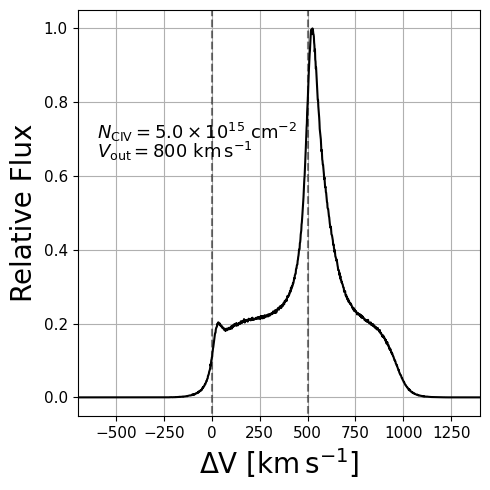

In [74]:
fig = plt.figure(11,figsize=(5,5))
atom  = 50   # 1.3 - 2.0
index = 15
expand = 800 
emit = 100 
vrand = 30  # 30 - 50 

tot_x_K, tot_y_K, tot_x_H, tot_y_H , tot_vx_K,tot_vy_K, tot_vx_H,tot_vy_H, tot_ratio = tot_spectrum(atom,index,expand,emit,vrand)

normal = max(tot_vy_K.max(),tot_vy_H.max())
plt.plot(tot_vx_K, tot_vy_K/normal,'k-')
print(tot_vy_K.max())
plt.plot(tot_vx_H, tot_vy_H/normal,'k-')
print(tot_vy_H.max())
print(tot_vy_K.max()/tot_vy_H.max() , 23.5 / 30)
# plt.xlim(-700,1200)
print(tot_ratio)
plt.xlabel(r'$\Delta \rm V ~ [\rm km\,s^{-1}]$',fontsize=20)
plt.ylabel('Relative Flux',fontsize=20)
plt.xlim(-700,1400)
plt.text(-600, 0.7, f'$N_{{\\rm CIV}} = {atom/10} \\times 10^{{{index}}} ~\\rm cm^{{-2}}$',size=13)
plt.text(-600, 0.65, f'$V_{{\\rm out}} = {expand} ~\\rm km\\,s^{{-1}}$',size=13)
pp = tot_vy_K.max()/tot_vy_H.max() 
plt.axvline(x=0,ymin=-1,ymax=10,linestyle='--',color='k',alpha=0.5)
plt.axvline(x=500,ymin=-1,ymax=10,linestyle='--',color='k',alpha=0.5)
plt.grid()
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.tight_layout()


# plt.savefig(f'/home/jin/바탕화면/Bset_Spectrum_Topping_First_{atom}_{index}_{expand}_{emit}_{vrand}.png',bbox_inches='tight')

30050.0
32105.0
0.9359912786170378 0.7833333333333333
0.7859332347790081
16462.0
16820.0
0.9787158145065399 0.7833333333333333
0.8417981014869673
30365.0
34718.0
0.8746183535917967 0.7833333333333333
0.6986882695099677


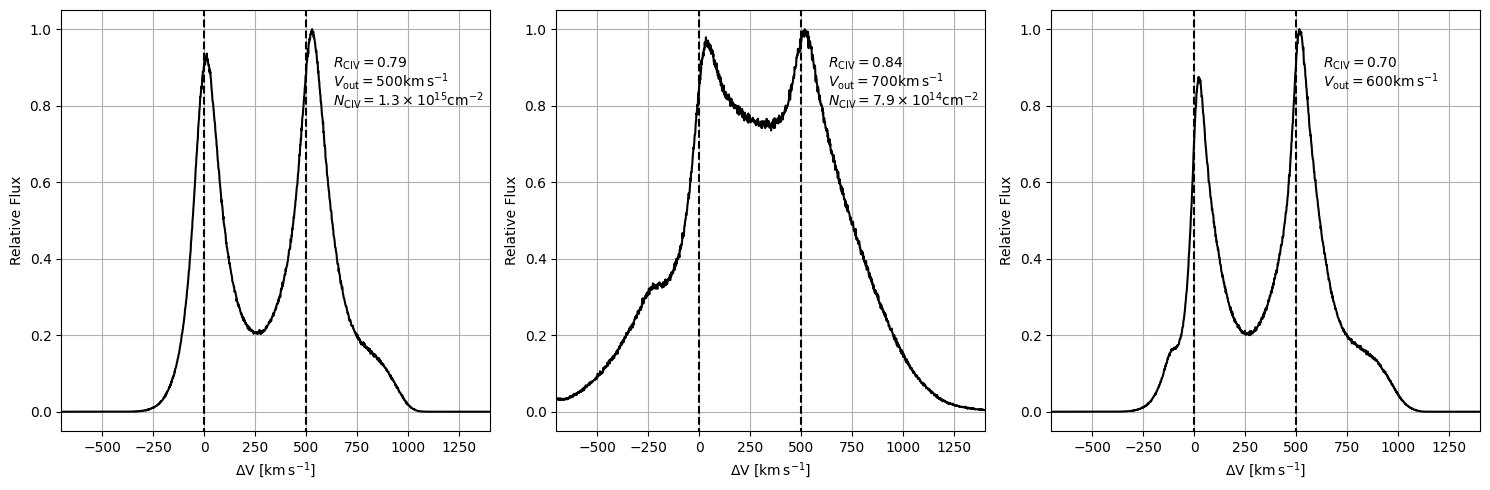

In [64]:
atom  = 13  # 13 - 20
index = 15
expand = 500 
emit = 100 
vrand = 50


tot_x_K, tot_y_K, tot_x_H, tot_y_H , tot_vx_K,tot_vy_K, tot_vx_H,tot_vy_H, tot_ratio = tot_spectrum(atom,index,expand,emit,vrand)

core_x_K, core_y_K, core_x_H, core_y_H , core_vx_K,core_vy_K, core_vx_H,core_vy_H , core_ratio = core_spectrum(atom,index,expand,emit,vrand)

halo_x_K, halo_y_K, halo_x_H, halo_y_H , halo_vx_K,halo_vy_K, halo_vx_H,halo_vy_H , halo_ratio = halo_spectrum(atom,index,expand,emit,vrand)
fig = plt.figure(1,figsize=(15,5))
plt.subplot(131)
normal = max(tot_vy_K.max(),tot_vy_H.max())
plt.plot(tot_vx_K, tot_vy_K/normal,'k-')
print(tot_vy_K.max())
plt.plot(tot_vx_H, tot_vy_H/normal,'k-')
print(tot_vy_H.max())
print(tot_vy_K.max()/tot_vy_H.max() , 23.5 / 30)
# plt.xlim(-700,1200)
print(tot_ratio)
plt.xlabel(r'$\Delta \rm V ~ [\rm km\,s^{-1}]$',fontsize=10)
plt.ylabel('Relative Flux',fontsize=10)
plt.xlim(-700,1400)
plt.text(630, 0.9, f'$R_{{\\rm CIV}} = {tot_ratio:.2f}$')
plt.text(630, 0.85, f'$V_{{\\rm out}} = {expand} \\rm km\\,s^{{-1}}$')
plt.text(630, 0.80, f'$N_{{\\rm CIV}} = {atom/10} \\times 10^{{{index}}} \\rm cm^{{-2}}$')

pp = tot_vy_K.max()/tot_vy_H.max() 
plt.axvline(x=0,ymin=-1,ymax=10,linestyle='--',color='k')
plt.axvline(x=500,ymin=-1,ymax=10,linestyle='--',color='k')
plt.grid()
plt.tight_layout()

plt.subplot(132)
expand = 700 
atom = 79
index = 14
emit = 300
tot_x_K, tot_y_K, tot_x_H, tot_y_H , tot_vx_K,tot_vy_K, tot_vx_H,tot_vy_H, tot_ratio = tot_spectrum(atom,index,expand,emit,vrand)

normal = max(tot_vy_K.max(),tot_vy_H.max())
plt.plot(tot_vx_K, tot_vy_K/normal,'k-')
print(tot_vy_K.max())
plt.plot(tot_vx_H, tot_vy_H/normal,'k-')
print(tot_vy_H.max())
print(tot_vy_K.max()/tot_vy_H.max() , 23.5 / 30)
# plt.xlim(-700,1200)
print(tot_ratio)
plt.xlabel(r'$\Delta \rm V ~ [\rm km\,s^{-1}]$',fontsize=10)
plt.ylabel('Relative Flux',fontsize=10)
plt.xlim(-700,1400)
plt.text(630, 0.9, f'$R_{{\\rm CIV}} = {tot_ratio:.2f}$')
plt.text(630, 0.85, f'$V_{{\\rm out}} = {expand} \\rm km\\,s^{{-1}}$')
pp = tot_vy_K.max()/tot_vy_H.max() 
plt.axvline(x=0,ymin=-1,ymax=10,linestyle='--',color='k')
plt.axvline(x=500,ymin=-1,ymax=10,linestyle='--',color='k')
plt.text(630, 0.80, f'$N_{{\\rm CIV}} = {atom/10} \\times 10^{{{index}}} \\rm cm^{{-2}}$')
plt.grid()
plt.tight_layout()

plt.subplot(133)
atom  = 13  # 13 - 20
index = 15
expand = 600 
emit = 100 
vrand = 30

tot_x_K, tot_y_K, tot_x_H, tot_y_H , tot_vx_K,tot_vy_K, tot_vx_H,tot_vy_H, tot_ratio = tot_spectrum(atom,index,expand,emit,vrand)

normal = max(tot_vy_K.max(),tot_vy_H.max())
plt.plot(tot_vx_K, tot_vy_K/normal,'k-')
print(tot_vy_K.max())
plt.plot(tot_vx_H, tot_vy_H/normal,'k-')
print(tot_vy_H.max())
print(tot_vy_K.max()/tot_vy_H.max() , 23.5 / 30)
# plt.xlim(-700,1200)
print(tot_ratio)
plt.xlabel(r'$\Delta \rm V ~ [\rm km\,s^{-1}]$',fontsize=10)
plt.ylabel('Relative Flux',fontsize=10)
plt.xlim(-700,1400)
plt.text(630, 0.9, f'$R_{{\\rm CIV}} = {tot_ratio:.2f}$')
plt.text(630, 0.85, f'$V_{{\\rm out}} = {expand} \\rm km\\,s^{{-1}}$')
pp = tot_vy_K.max()/tot_vy_H.max() 
plt.axvline(x=0,ymin=-1,ymax=10,linestyle='--',color='k')
plt.axvline(x=500,ymin=-1,ymax=10,linestyle='--',color='k')
plt.grid()
plt.tight_layout()
# plt.savefig(f'/home/jin/바탕화면/Best_Spectrum_{atom}_{index}_{expand}_{emit}_{vrand}.png',bbox_inches='tight')

35464.0
35485.0
0.9994082006481612 0.7833333333333333
0.7947478325661925


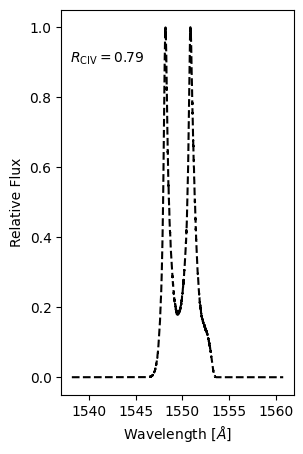

In [11]:
atom  = 13   # 1.3 - 2.0
index = 15
expand = 500 
emit = 100
vrand = 30  # 30 - 50 


tot_x_K, tot_y_K, tot_x_H, tot_y_H , tot_vx_K,tot_vy_K, tot_vx_H,tot_vy_H, tot_ratio = tot_spectrum(atom,index,expand,emit,vrand)

core_x_K, core_y_K, core_x_H, core_y_H , core_vx_K,core_vy_K, core_vx_H,core_vy_H , core_ratio = core_spectrum(atom,index,expand,emit,vrand)

halo_x_K, halo_y_K, halo_x_H, halo_y_H , halo_vx_K,halo_vy_K, halo_vx_H,halo_vy_H , halo_ratio = halo_spectrum(atom,index,expand,emit,vrand)
fig = plt.figure(1,figsize=(3,5))
normal = max(tot_y_K.max(),tot_y_H.max())
plt.plot(tot_x_K, tot_y_K/normal,'k--')
print(tot_vy_K.max())
plt.plot(tot_x_H, tot_y_H/normal,'k--')
print(tot_vy_H.max())
print(tot_vy_K.max()/tot_vy_H.max() , 23.5 / 30)
# plt.xlim(-700,1200)
print(tot_ratio)
plt.xlabel('Wavelength $[\AA]$',fontsize=10)
plt.ylabel('Relative Flux',fontsize=10)

plt.text(1538, 0.9, f'$R_{{\\rm CIV}} = {tot_ratio:.2f}$')
pp = tot_vy_K.max()/tot_vy_H.max() 
# plt.text(1538, 0.8, f'$R_{{\\rm peak}} = {pp :.2f}$')


# plt.savefig(f'/home/jin/바탕화면/Ex_Spectrum_{atom}_{index}_{expand}_{emit}_{vrand}.png',bbox_inches='tight')

22068.0
36769.0
0.6001794990345127 0.7833333333333333
0.5434562358157851


Text(1538, 0.8, '$R_{\\rm peak} = 0.60$')

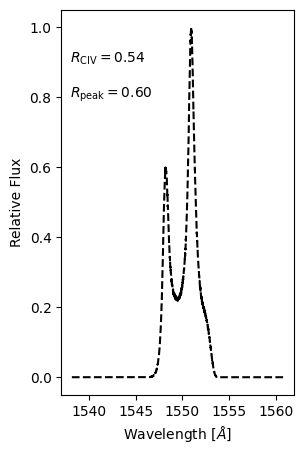

In [12]:
atom  = 20
index = 15
expand = 500 
emit = 100 
vrand = 50


tot_x_K, tot_y_K, tot_x_H, tot_y_H , tot_vx_K,tot_vy_K, tot_vx_H,tot_vy_H, tot_ratio = tot_spectrum(atom,index,expand,emit,vrand)

core_x_K, core_y_K, core_x_H, core_y_H , core_vx_K,core_vy_K, core_vx_H,core_vy_H , core_ratio = core_spectrum(atom,index,expand,emit,vrand)

halo_x_K, halo_y_K, halo_x_H, halo_y_H , halo_vx_K,halo_vy_K, halo_vx_H,halo_vy_H , halo_ratio = halo_spectrum(atom,index,expand,emit,vrand)
fig = plt.figure(1,figsize=(3,5))
normal = max(tot_y_K.max(),tot_y_H.max())
plt.plot(tot_x_K, tot_y_K/normal,'k--')
print(tot_vy_K.max())
plt.plot(tot_x_H, tot_y_H/normal,'k--')
print(tot_vy_H.max())
print(tot_vy_K.max()/tot_vy_H.max() , 23.5 / 30)
# plt.xlim(-700,1200)
print(tot_ratio)
plt.xlabel('Wavelength $[\AA]$',fontsize=10)
plt.ylabel('Relative Flux',fontsize=10)

plt.text(1538, 0.9, f'$R_{{\\rm CIV}} = {tot_ratio:.2f}$')
pp = tot_vy_K.max()/tot_vy_H.max() 
plt.text(1538, 0.8, f'$R_{{\\rm peak}} = {pp :.2f}$')


# plt.savefig(f'/home/jin/바탕화면/Spectrum_{atom}_{index}_{expand}_{emit}_{vrand}.png',bbox_inches='tight')

70848.0
52798.0
1.3418690101897799 0.7833333333333333
0.6577216961842878


Text(1538, 0.8, '$R_{\\rm peak} = 1.34$')

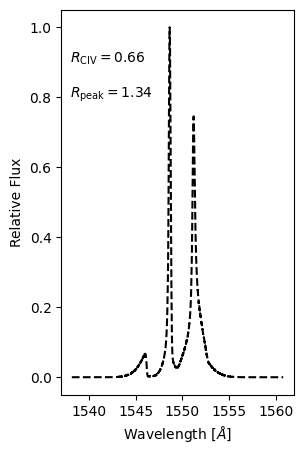

In [13]:
atom  = 50 # 13 - 20 
index = 16
expand = 300 
emit = 300 
vrand = 50


tot_x_K, tot_y_K, tot_x_H, tot_y_H , tot_vx_K,tot_vy_K, tot_vx_H,tot_vy_H, tot_ratio = tot_spectrum(atom,index,expand,emit,vrand)

core_x_K, core_y_K, core_x_H, core_y_H , core_vx_K,core_vy_K, core_vx_H,core_vy_H , core_ratio = core_spectrum(atom,index,expand,emit,vrand)

halo_x_K, halo_y_K, halo_x_H, halo_y_H , halo_vx_K,halo_vy_K, halo_vx_H,halo_vy_H , halo_ratio = halo_spectrum(atom,index,expand,emit,vrand)
fig = plt.figure(1,figsize=(3,5))
normal = max(tot_y_K.max(),tot_y_H.max())
plt.plot(tot_x_K, tot_y_K/normal,'k--')
print(tot_vy_K.max())
plt.plot(tot_x_H, tot_y_H/normal,'k--')
print(tot_vy_H.max())
print(tot_vy_K.max()/tot_vy_H.max() , 23.5 / 30)
# plt.xlim(-700,1200)
print(tot_ratio)
plt.xlabel('Wavelength $[\AA]$',fontsize=10)
plt.ylabel('Relative Flux',fontsize=10)
plt.text(1538, 0.9, f'$R_{{\\rm CIV}} = {tot_ratio:.2f}$')
pp = tot_vy_K.max()/tot_vy_H.max() 
plt.text(1538, 0.8, f'$R_{{\\rm peak}} = {pp :.2f}$')

# plt.savefig(f'/home/jin/바탕화면/Spectrum_{atom}_{index}_{expand}_{emit}_{vrand}_example.png',bbox_inches='tight')

11886.0
15029.0
0.7908709827666511 0.7833333333333333
0.7596460565271762


Text(1538, 0.8, '$R_{\\rm peak} = 0.79$')

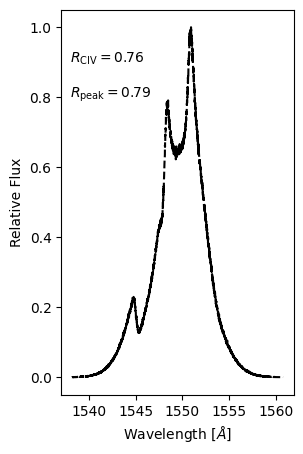

In [14]:
atom  = 79
index = 14
expand = 600 
emit = 500
vrand = 50

tot_x_K, tot_y_K, tot_x_H, tot_y_H , tot_vx_K,tot_vy_K, tot_vx_H,tot_vy_H, tot_ratio = tot_spectrum(atom,index,expand,emit,vrand)

core_x_K, core_y_K, core_x_H, core_y_H , core_vx_K,core_vy_K, core_vx_H,core_vy_H , core_ratio = core_spectrum(atom,index,expand,emit,vrand)

halo_x_K, halo_y_K, halo_x_H, halo_y_H , halo_vx_K,halo_vy_K, halo_vx_H,halo_vy_H , halo_ratio = halo_spectrum(atom,index,expand,emit,vrand)
fig = plt.figure(1,figsize=(3,5))
normal = max(tot_y_K.max(),tot_y_H.max())
plt.plot(tot_x_K, tot_y_K/normal,'k--')
print(tot_vy_K.max())
plt.plot(tot_x_H, tot_y_H/normal,'k--')
print(tot_vy_H.max())
print(tot_vy_K.max()/tot_vy_H.max() , 23.5 / 30)
# plt.xlim(-700,1200)
print(tot_ratio)
plt.xlabel('Wavelength $[\AA]$',fontsize=10)
plt.ylabel('Relative Flux',fontsize=10)
plt.text(1538, 0.9, f'$R_{{\\rm CIV}} = {tot_ratio:.2f}$')
pp = tot_vy_K.max()/tot_vy_H.max() 
plt.text(1538, 0.8, f'$R_{{\\rm peak}} = {pp :.2f}$')

# plt.savefig(f'/home/jin/바탕화면/Spectrum_{atom}_{index}_{expand}_{emit}_{vrand}.png',bbox_inches='tight')

0.7908709827666511 0.7833333333333333
0.7596460565271762


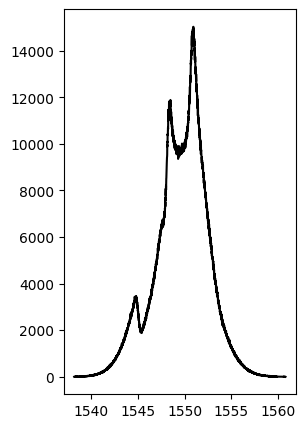

In [15]:
atom  = 79
index = 14
expand = 600 
emit = 500
vrand = 50

fig = plt.figure(1,figsize=(3,5))
tot_x_K, tot_y_K, tot_x_H, tot_y_H , tot_vx_K,tot_vy_K, tot_vx_H,tot_vy_H, tot_ratio = tot_spectrum(atom,index,expand,emit,vrand)

core_x_K, core_y_K, core_x_H, core_y_H , core_vx_K,core_vy_K, core_vx_H,core_vy_H , core_ratio = core_spectrum(atom,index,expand,emit,vrand)

halo_x_K, halo_y_K, halo_x_H, halo_y_H , halo_vx_K,halo_vy_K, halo_vx_H,halo_vy_H , halo_ratio = halo_spectrum(atom,index,expand,emit,vrand)
fig = plt.figure(1,figsize=(3,5))
plt.plot(tot_x_K, tot_y_K,'k-')
plt.plot(tot_x_H, tot_y_H,'k-')

# plt.plot(core_x_K, core_y_K,'k-')
# plt.plot(core_x_H, core_y_H,'k-')

# plt.plot(halo_x_K, halo_y_K,'k--')
# plt.plot(halo_x_H, halo_y_H,'k--')
print(tot_vy_K.max()/tot_vy_H.max() , 23.5 / 30)

# plt.xlim(-700,1200)
print(tot_ratio)

0.7966402935443183 0.7833333333333333
0.7639638016310659


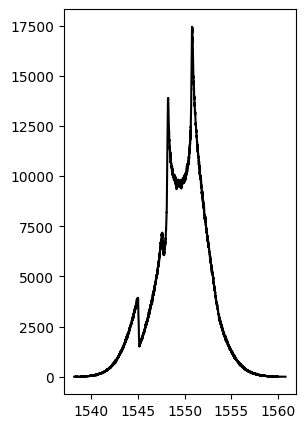

In [16]:
atom  = 79
index = 14
expand = 600 
emit = 500
vrand = 11.8

fig = plt.figure(1,figsize=(3,5))
tot_x_K, tot_y_K, tot_x_H, tot_y_H , tot_vx_K,tot_vy_K, tot_vx_H,tot_vy_H, tot_ratio = tot_spectrum(atom,index,expand,emit,vrand)

core_x_K, core_y_K, core_x_H, core_y_H , core_vx_K,core_vy_K, core_vx_H,core_vy_H , core_ratio = core_spectrum(atom,index,expand,emit,vrand)

halo_x_K, halo_y_K, halo_x_H, halo_y_H , halo_vx_K,halo_vy_K, halo_vx_H,halo_vy_H , halo_ratio = halo_spectrum(atom,index,expand,emit,vrand)
fig = plt.figure(1,figsize=(3,5))
plt.plot(tot_x_K, tot_y_K,'k-')
plt.plot(tot_x_H, tot_y_H,'k-')

# plt.plot(core_x_K, core_y_K,'k-')
# plt.plot(core_x_H, core_y_H,'k-')

# plt.plot(halo_x_K, halo_y_K,'k--')
# plt.plot(halo_x_H, halo_y_H,'k--')
print(tot_vy_K.max()/tot_vy_H.max() , 23.5 / 30)

# plt.xlim(-700,1200)
print(tot_ratio)

1.645498635950288 0.7833333333333333
1.408683728612583


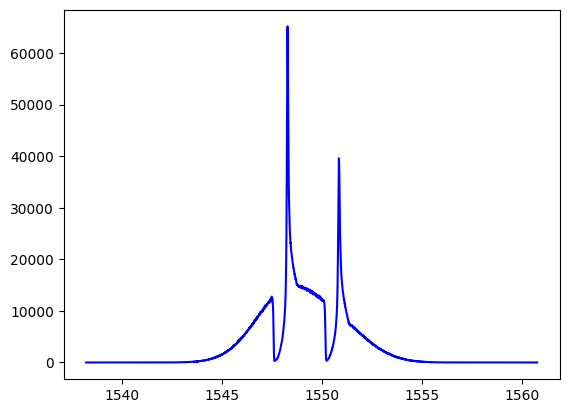

In [17]:
atom  = 50
index = 15
expand = 100 
emit = 300
vrand = 11.8



tot_x_K, tot_y_K, tot_x_H, tot_y_H , tot_vx_K,tot_vy_K, tot_vx_H,tot_vy_H, tot_ratio = tot_spectrum(atom,index,expand,emit,vrand)

core_x_K, core_y_K, core_x_H, core_y_H , core_vx_K,core_vy_K, core_vx_H,core_vy_H , core_ratio = core_spectrum(atom,index,expand,emit,vrand)

halo_x_K, halo_y_K, halo_x_H, halo_y_H , halo_vx_K,halo_vy_K, halo_vx_H,halo_vy_H , halo_ratio = halo_spectrum(atom,index,expand,emit,vrand)

# plt.plot(halo_x_K,halo_y_K,'k-')
# plt.plot(halo_x_H,halo_y_H ,'k-')

# plt.plot(core_x_K,core_y_K,'k-')
# plt.plot(core_x_H,core_y_H ,'k-')

plt.plot(tot_x_K,tot_y_K,'b-')
plt.plot(tot_x_H,tot_y_H ,'b-')



print(tot_vy_K.max()/tot_vy_H.max() , 23.5 / 30)

# plt.xlim(-700,1200)
print(tot_ratio)

1.522959282160003


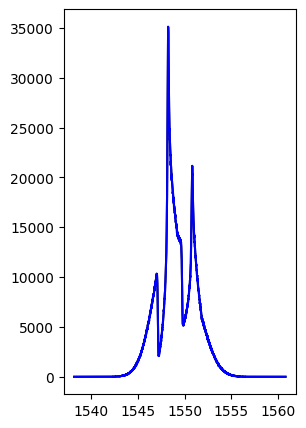

In [18]:
atom  = 50
index = 14
expand = 200 
emit = 300
vrand = 11.8


tot_x_K, tot_y_K, tot_x_H, tot_y_H , tot_vx_K,tot_vy_K, tot_vx_H,tot_vy_H, tot_ratio = tot_spectrum(atom,index,expand,emit,vrand)

core_x_K, core_y_K, core_x_H, core_y_H , core_vx_K,core_vy_K, core_vx_H,core_vy_H , core_ratio = core_spectrum(atom,index,expand,emit,vrand)

halo_x_K, halo_y_K, halo_x_H, halo_y_H , halo_vx_K,halo_vy_K, halo_vx_H,halo_vy_H , halo_ratio = halo_spectrum(atom,index,expand,emit,vrand)
fig = plt.figure(1,figsize=(3,5))


plt.plot(halo_x_K,halo_y_K,'k-')
plt.plot(halo_x_H,halo_y_H ,'k-')

plt.plot(tot_x_K,tot_y_K,'b-')
plt.plot(tot_x_H,tot_y_H ,'b-')


# plt.xlim(-700,1200)
print(core_ratio)